In [2]:
import os, sys
import time
import numpy as np
import pandas as pd
import random
from scipy import stats as st
import itertools
from collections import defaultdict

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns

# Inits

In [77]:
# get currently working directory
base_dir = os.getcwd()

# load functions from other notebooks
helpers_file = os.path.join(base_dir, 'helpers.ipynb')
%run $helpers_file

## uncomment the following lines if you want to run the various strategies in budget_strategies
# implemented_strategies = os.path.join(base_dir, 'budget_strategies.ipynb')
# %run $implemented_strategies
%store -r random_cfs
%store -r jaccard_on_embeddings_cfs
%store -r cosine_on_embeddings_cfs

%store -r bfs_yloss_cfs
%store -r bfs_fixed_yloss_cfs
%store -r dfs_yloss_cfs
%store -r dfs_fixed_yloss_cfs
%store -r bestfs_yloss_cfs
%store -r bestfs_fixed_yloss_cfs
%store -r bidirectional_cfs
%store -r brute_force_cfs

no stored variable or alias jaccard_on_embeddings_cfs
no stored variable or alias cosine_on_embeddings_cfs


# Plots

In [2]:
from collections import Counter


# cnt = dict.fromkeys(most_sim_cfs.keys())
# no_target_achieved_cases = dict.fromkeys(most_sim_cfs.keys())
cnt = defaultdict(dict)
no_target_achieved_cases = defaultdict(list)

for i in range(2):
    cnt, no_target_achieved_cases = convert_res_to_lists(random_cfs[i], cnt, no_target_achieved_cases, f'random_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(most_sim_cfs[i], cnt, no_target_achieved_cases, f'most_sim_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(most_sim_jaccard_cfs[i], cnt, no_target_achieved_cases, f'jaccard_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(yloss_sim_cfs[i], cnt, no_target_achieved_cases, f'yloss_{i}')

NameError: name 'convert_res_to_lists' is not defined

Text(0.5, 0.98, 'No of items to exclude from interacted list to exclude target from top-10 recommendations')

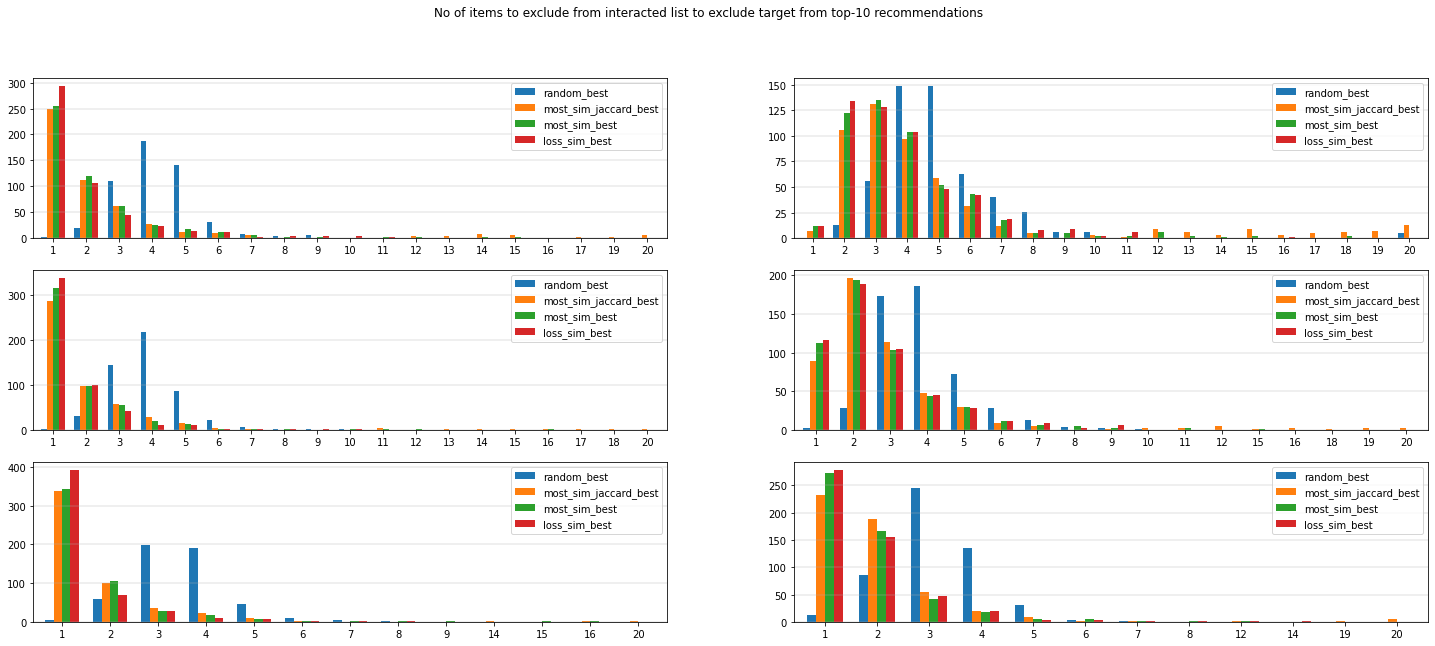

In [381]:
rows, cols = 3, 2
fig, axs = plt.subplots(rows, cols, figsize=(25, 10))

for col in range(cols):
    for pos, row in zip([3, 5, 7], range(rows)):
        df = pd.DataFrame.from_dict({
            'random_best': cnt[pos][f'random_{col}'][1],
#             'most_sim_jaccard_init': cnt[pos][f'jaccard_{col}'][0],
#             'most_sim_init': cnt[pos][f'most_sim_{col}'][0],
#             'loss_sim_init': cnt[pos][f'yloss_{col}'][0],
            'most_sim_jaccard_best': cnt[pos][f'jaccard_{col}'][1],
            'most_sim_best': cnt[pos][f'most_sim_{col}'][1],
            'loss_sim_best': cnt[pos][f'yloss_{col}'][1]
        }, orient='columns')
        df.sort_index().plot.bar(ax=axs[row][col], rot=0, width=0.7).grid(axis='y', linewidth=0.4)

plt.suptitle('No of items to exclude from interacted list to exclude target from top-10 recommendations')

Text(0.5, 0.98, 'Cumulative no of items to exclude from interacted list to exclude target from top-10 recommendations')

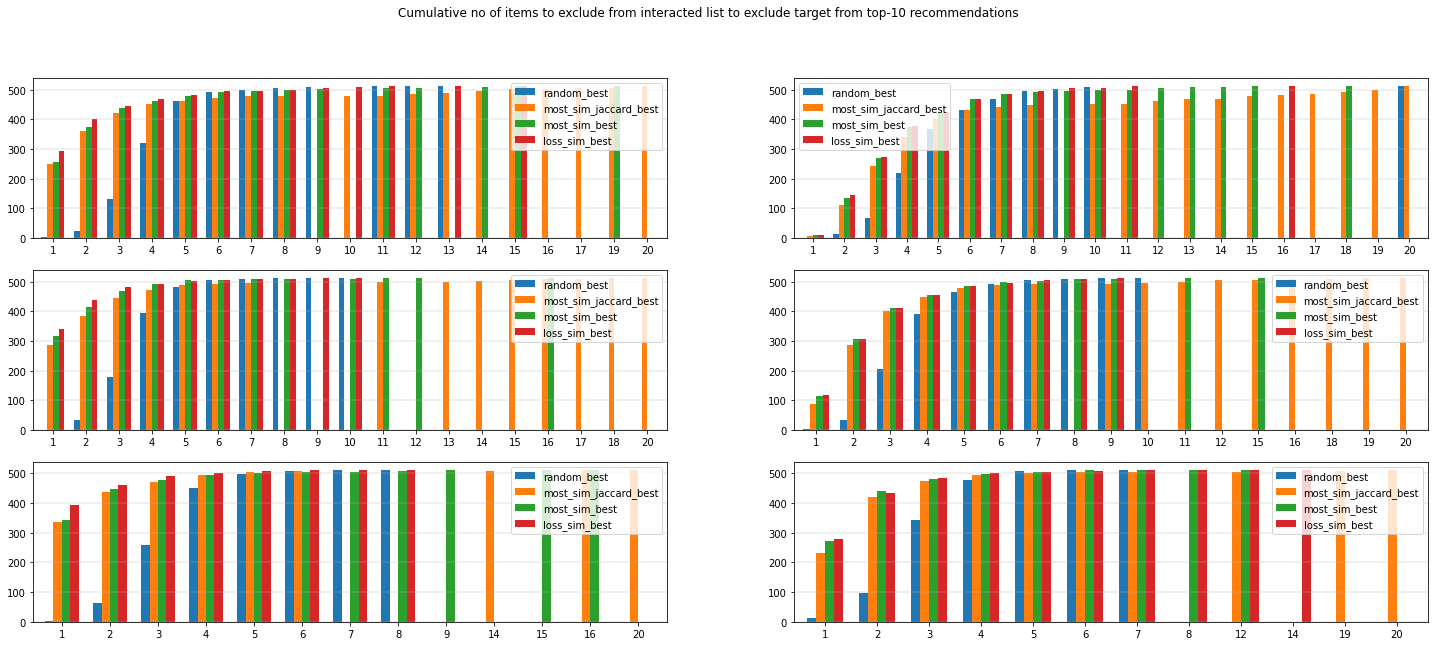

In [382]:
rows, cols = 3, 2
fig, axs = plt.subplots(rows, cols, figsize=(25, 10))

for col in range(cols):
    for pos, row in zip([3, 5, 7], range(rows)):
        df = pd.DataFrame.from_dict({
            'random_best': cnt[pos][f'random_{col}'][1],
#             'most_sim_jaccard_init': cnt[pos][f'jaccard_{col}'][0],
#             'most_sim_init': cnt[pos][f'most_sim_{col}'][0],
#             'loss_sim_init': cnt[pos][f'yloss_{col}'][0],
            'most_sim_jaccard_best': cnt[pos][f'jaccard_{col}'][1],
            'most_sim_best': cnt[pos][f'most_sim_{col}'][1],
            'loss_sim_best': cnt[pos][f'yloss_{col}'][1]
        }, orient='columns')
        df.sort_index().cumsum().plot.bar(ax=axs[row][col], rot=0, width=0.7).grid(axis='y', linewidth=0.4)

plt.suptitle('Cumulative no of items to exclude from interacted list to exclude target from top-10 recommendations')

## Distribution of budget consumption

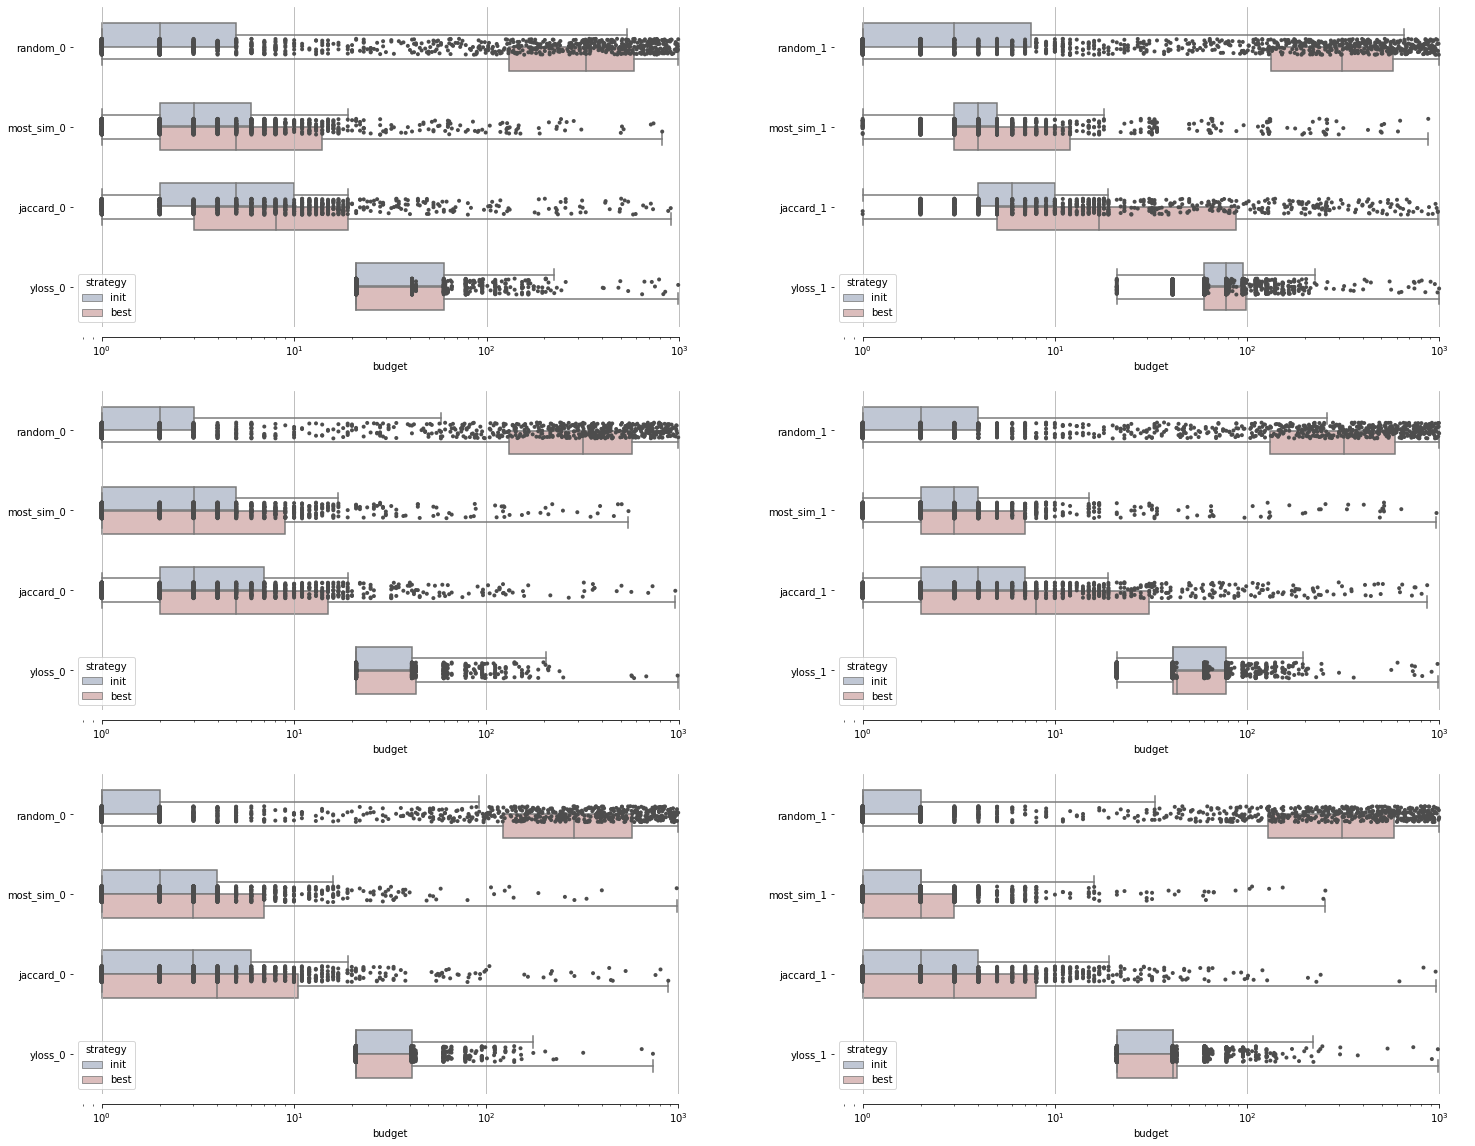

In [303]:
# sns.set_theme(style="ticks")
# pos = [2, 3]
strategies = [('init', 2), ('best', 3)]
# pos = [2]
# strategies = ['init']
cnames = ['method', 'strategy', 'budget']

# Initialize the figure with a logarithmic x axis
# f, ax = plt.subplots(3, 1, figsize=(20, 20))
rows, cols = 3, 2
fig, axs = plt.subplots(rows, cols, figsize=(25, 20))

for col in range(cols):
    for pos, row in zip([3, 5, 7], range(rows)):

        df = pd.DataFrame.from_records(
            list(itertools.chain(*(
                zip(itertools.repeat(k), itertools.repeat(t[0]), v[t[1]])
                for k, v in cnt[pos].items() if f'_{col}' in k
                for t in strategies
            ))), columns=cnames
        )

        # Plot the orbital period with horizontal boxes
        sns.boxplot(x='budget', y='method', hue='strategy', data=df,
                    whis=[0, 100], width=.6, palette="vlag", ax=axs[row][col])

        # Add in points to show each observation
        sns.stripplot(x='budget', y='method', data=df,
                      size=4, color=".3", linewidth=0, ax=axs[row][col])


        # Tweak the visual presentation
        axs[row][col].set_xscale("log")
        axs[row][col].xaxis.grid(True)
        axs[row][col].set(ylabel="")

sns.despine(trim=True, offset=10, left=True)

## Randomized pick of candidates of interaction lists in lattice

In [34]:
random_most_sim_cfs = _find_cfs(test, pooling_model, [3, 5, 7], no_users=500, backend='random_most_sim', init_budget=1000)
random_yloss_sim_cfs = _find_cfs(test, pooling_model, [3, 5, 7], no_users=500, backend='random_loss_sim', init_budget=1000)

target position loop:   0%|          | 0/3 [00:00<?, ?it/s]

target position loop: 20it [00:52,  2.61s/it]              

target position loop: 30it [01:07,  2.29s/it]

target position loop: 30it [01:14,  2.49s/it]
target position loop:   0%|          | 0/3 [00:00<?, ?it/s]

target position loop: 20it [00:25,  1.25s/it]              

target position loop: 30it [00:40,  1.35s/it]

target position loop: 30it [00:51,  1.73s/it]


In [38]:
from collections import Counter


# cnt = dict.fromkeys(most_sim_cfs.keys())
# no_target_achieved_cases = dict.fromkeys(most_sim_cfs.keys())
cnt = defaultdict(dict)
no_target_achieved_cases = defaultdict(list)

cnt, no_target_achieved_cases = convert_res_to_lists(random_cfs, cnt, no_target_achieved_cases, 'random')
cnt, no_target_achieved_cases = convert_res_to_lists(most_sim_cfs, cnt, no_target_achieved_cases, 'most_sim')
cnt, no_target_achieved_cases = convert_res_to_lists(yloss_sim_cfs, cnt, no_target_achieved_cases, 'yloss')
cnt, no_target_achieved_cases = convert_res_to_lists(random_most_sim_cfs, cnt, no_target_achieved_cases, 'random_most_sim')
cnt, no_target_achieved_cases = convert_res_to_lists(random_yloss_sim_cfs, cnt, no_target_achieved_cases, 'random_yloss')

Text(0.5, 0.98, 'No of items to exclude from interacted list to exclude target from top-10 recommendations')

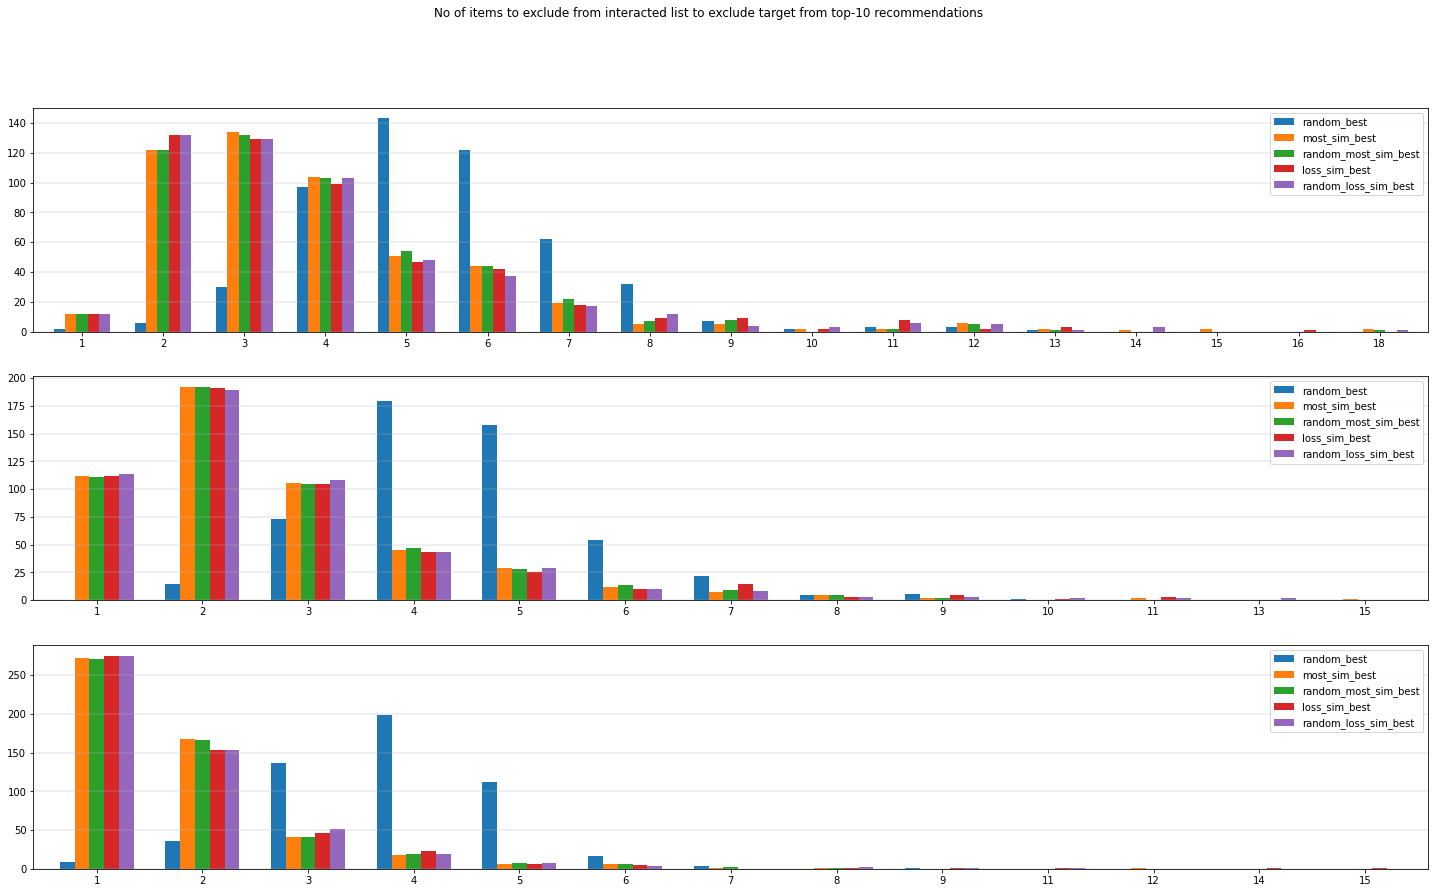

In [39]:
fig, axs = plt.subplots(3, 1, figsize=(25, 14))

df = pd.DataFrame.from_dict({
    'random_best': cnt[3]['random'][1],
    'most_sim_best': cnt[3]['most_sim'][1],
    'random_most_sim_best': cnt[3]['random_most_sim'][1],
    'loss_sim_best': cnt[3]['yloss'][1],
    'random_loss_sim_best': cnt[3]['random_yloss'][1],
}, orient='columns')
df.sort_index().plot.bar(ax=axs[0], rot=0, width=0.7).grid(axis='y', linewidth=0.4)

df = pd.DataFrame.from_dict({
    'random_best': cnt[5]['random'][1],   
    'most_sim_best': cnt[5]['most_sim'][1],
    'random_most_sim_best': cnt[5]['random_most_sim'][1],
    'loss_sim_best': cnt[5]['yloss'][1],
    'random_loss_sim_best': cnt[5]['random_yloss'][1],
}, orient='columns')
# df.sort_index().plot.bar(y=['most_sim_init', 'most_sim_best', 'random_best'], ax=axs[1], rot=0)
df.sort_index().plot.bar(ax=axs[1], rot=0, width=0.7).grid(axis='y', linewidth=0.4)

df = pd.DataFrame.from_dict({
    'random_best': cnt[7]['random'][1],
    'most_sim_best': cnt[7]['most_sim'][1],
    'random_most_sim_best': cnt[7]['random_most_sim'][1],
    'loss_sim_best': cnt[7]['yloss'][1],
    'random_loss_sim_best': cnt[7]['random_yloss'][1],
}, orient='columns')
df.sort_index().plot.bar(ax=axs[2], rot=0, width=0.7).grid(axis='y', linewidth=0.4)

plt.suptitle('No of items to exclude from interacted list to exclude target from top-10 recommendations')

Text(0.5, 0.98, 'Cumulative no of items to exclude from interacted list to exclude target from top-10 recommendations')

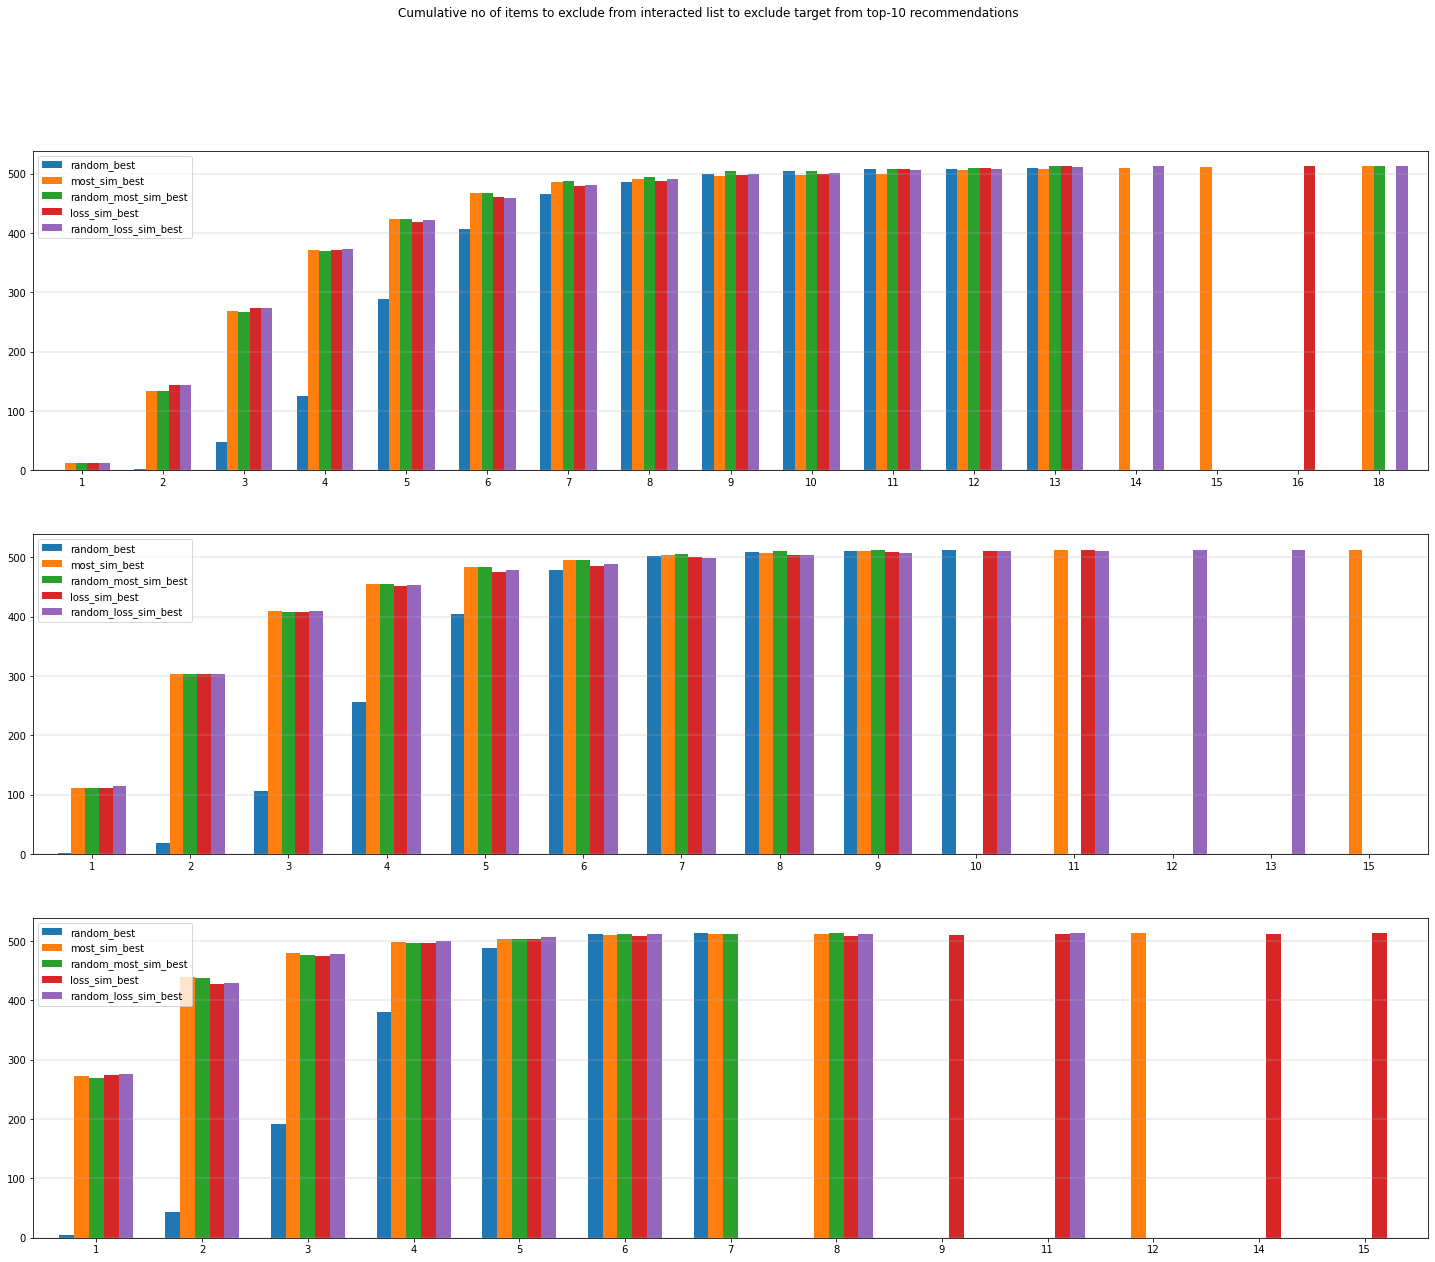

In [46]:
fig, axs = plt.subplots(3, 1, figsize=(25, 20))

df = pd.DataFrame.from_dict({
    'random_best': cnt[3]['random'][1],    
    'most_sim_best': cnt[3]['most_sim'][1],
    'random_most_sim_best': cnt[3]['random_most_sim'][1],
    'loss_sim_best': cnt[3]['yloss'][1],
    'random_loss_sim_best': cnt[3]['random_yloss'][1],
}, orient='columns')
df.sort_index().cumsum().plot.bar(ax=axs[0], rot=0, width=0.7).grid(axis='y', linewidth=0.4)

df = pd.DataFrame.from_dict({
    'random_best': cnt[5]['random'][1],
    'most_sim_best': cnt[5]['most_sim'][1],
    'random_most_sim_best': cnt[5]['random_most_sim'][1],
    'loss_sim_best': cnt[5]['yloss'][1],
    'random_loss_sim_best': cnt[5]['random_yloss'][1],
}, orient='columns')
df.sort_index().cumsum().plot.bar(ax=axs[1], rot=0, width=0.7).grid(axis='y', linewidth=0.4)

df = pd.DataFrame.from_dict({
   'random_best': cnt[7]['random'][1],
    'most_sim_best': cnt[7]['most_sim'][1],
    'random_most_sim_best': cnt[7]['random_most_sim'][1],
    'loss_sim_best': cnt[7]['yloss'][1],
    'random_loss_sim_best': cnt[7]['random_yloss'][1],
}, orient='columns')
df.sort_index().cumsum().plot.bar(ax=axs[2], rot=0, width=0.7).grid(axis='y', linewidth=0.4)

plt.suptitle('Cumulative no of items to exclude from interacted list to exclude target from top-10 recommendations')

## DFS search and fix ordering of excluding interacted items based on target's yloss

In [9]:
from collections import Counter


# cnt = dict.fromkeys(most_sim_cfs.keys())
# no_target_achieved_cases = dict.fromkeys(most_sim_cfs.keys())
cnt = defaultdict(dict)
no_target_achieved_cases = defaultdict(list)

for i in range(2):
    cnt, no_target_achieved_cases = convert_res_to_lists(random_cfs[i], cnt, no_target_achieved_cases, f'random_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(bfs_yloss_cfs[i], cnt, no_target_achieved_cases, f'bfs_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(bfs_fixed_yloss_cfs[i], cnt, no_target_achieved_cases, f'bfs_fixed_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(dfs_yloss_cfs[i], cnt, no_target_achieved_cases, f'dfs_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(dfs_fixed_yloss_cfs[i], cnt, no_target_achieved_cases, f'dfs_fixed_{i}')

Text(0.5, 0.98, 'No of items to exclude from interacted list to exclude target from top-10 recommendations')

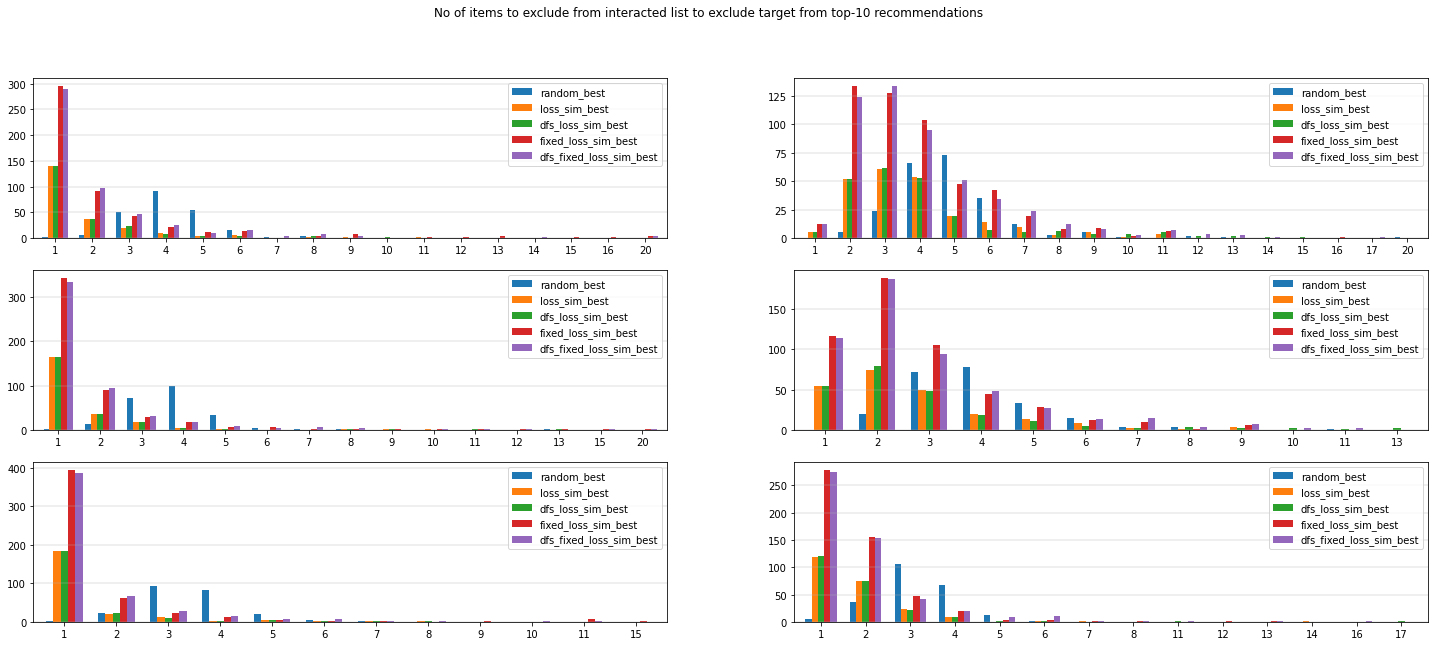

In [12]:
rows, cols = 3, 2
fig, axs = plt.subplots(rows, cols, figsize=(25, 10))

for col in range(cols):
    for pos, row in zip([3, 5, 7], range(rows)):
        df = pd.DataFrame.from_dict({
            'random_best': cnt[pos][f'random_{col}'][1],
#             'loss_sim_init': cnt[pos][f'yloss_{col}'][0],
            'loss_sim_best': cnt[pos][f'bfs_{col}'][1],
        #     'dfs_loss_sim_init': cnt[3]['dfs_yloss'][0],
            'dfs_loss_sim_best': cnt[pos][f'dfs_{col}'][1],
#             'fixed_loss_sim_init': cnt[pos][f'fixed_yloss_{col}'][0],
            'fixed_loss_sim_best': cnt[pos][f'bfs_fixed_{col}'][1],
        #     'dfs_fixed_loss_sim_init': cnt[3]['dfs_fixed_yloss'][0],
            'dfs_fixed_loss_sim_best': cnt[pos][f'dfs_fixed_{col}'][1],
        }, orient='columns')
        df.sort_index().plot.bar(ax=axs[row][col], rot=0, width=0.7).grid(axis='y', linewidth=0.4)

plt.suptitle('No of items to exclude from interacted list to exclude target from top-10 recommendations')

Text(0.5, 0.98, 'Cumulative no of items to exclude from interacted list to exclude target from top-10 recommendations')

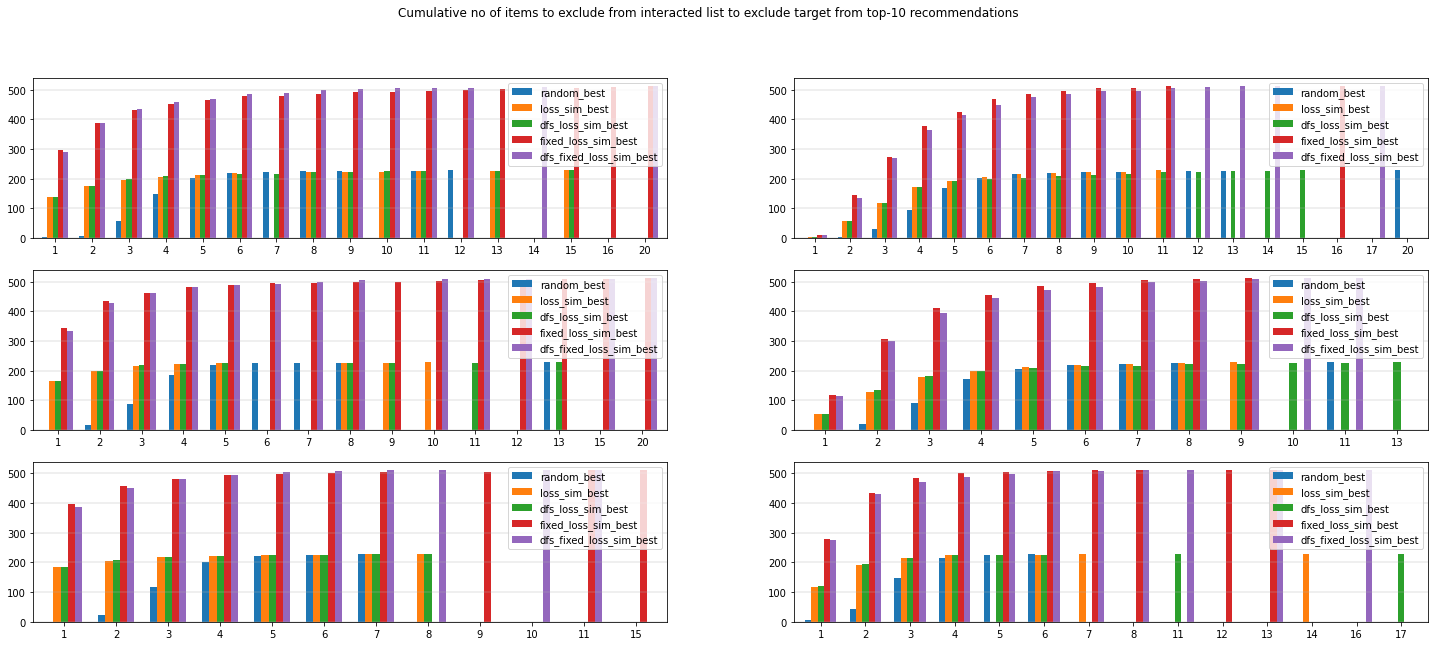

In [13]:
rows, cols = 3, 2
fig, axs = plt.subplots(rows, cols, figsize=(25, 10))

for col in range(cols):
    for pos, row in zip([3, 5, 7], range(rows)):
        df = pd.DataFrame.from_dict({
            'random_best': cnt[pos][f'random_{col}'][1],
#             'loss_sim_init': cnt[pos][f'yloss_{col}'][0],
            'loss_sim_best': cnt[pos][f'bfs_{col}'][1],
            'dfs_loss_sim_best': cnt[pos][f'dfs_{col}'][1],
#             'fixed_loss_sim_init': cnt[pos][f'fixed_yloss_{col}'][0],
            'fixed_loss_sim_best': cnt[pos][f'bfs_fixed_{col}'][1],
        #     'dfs_fixed_loss_sim_init': cnt[3]['dfs_fixed_yloss'][0],
            'dfs_fixed_loss_sim_best': cnt[pos][f'dfs_fixed_{col}'][1],
        }, orient='columns')
        df.sort_index().cumsum().plot.bar(ax=axs[row][col], rot=0, width=0.7).grid(axis='y', linewidth=0.4)

plt.suptitle('Cumulative no of items to exclude from interacted list to exclude target from top-10 recommendations')

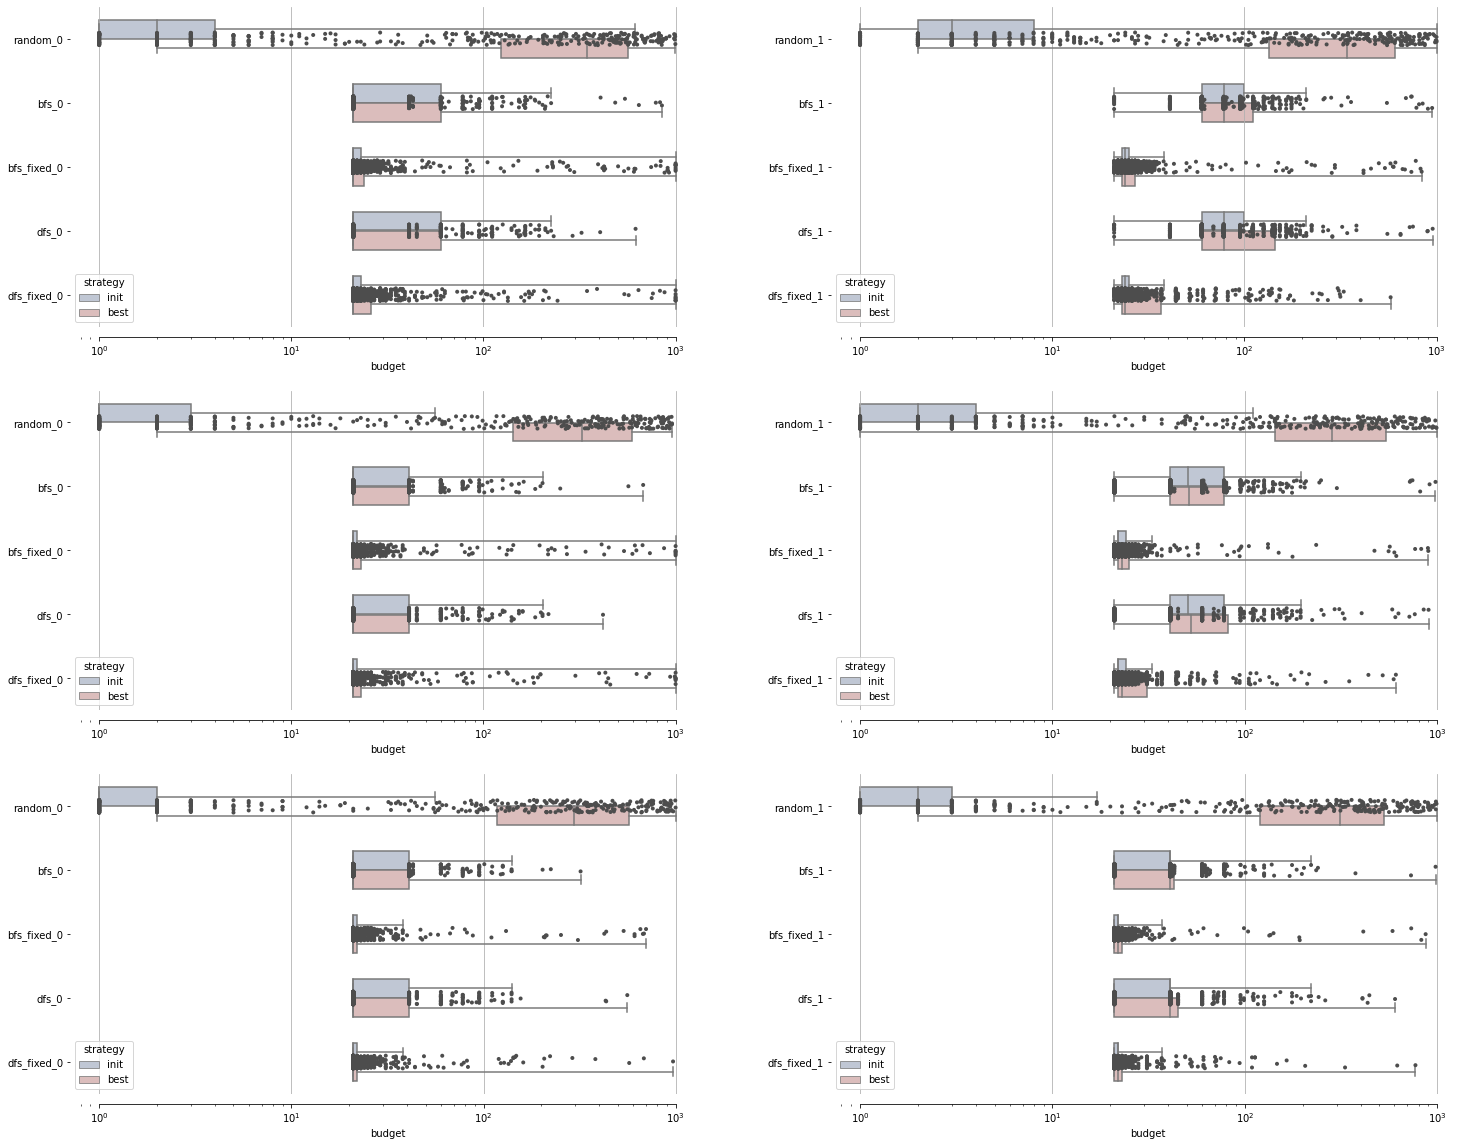

In [14]:
# sns.set_theme(style="ticks")
strategies = [('init', 2), ('best', 3)]
# pos = [2]
# strategies = ['init']
cnames = ['method', 'strategy', 'budget']

# Initialize the figure with a logarithmic x axis
# f, ax = plt.subplots(3, 1, figsize=(20, 20))
rows, cols = 3, 2
fig, axs = plt.subplots(rows, cols, figsize=(25, 20))

for col in range(cols):
    for pos, row in zip([3, 5, 7], range(rows)):

        df = pd.DataFrame.from_records(
            list(itertools.chain(*(
                zip(itertools.repeat(k), itertools.repeat(t[0]), v[t[1]])
                for k, v in cnt[pos].items() if f'_{col}' in k
                for t in strategies
            ))), columns=cnames
        )

        # Plot the orbital period with horizontal boxes
        sns.boxplot(x='budget', y='method', hue='strategy', data=df,
                    whis=[0, 100], width=.6, palette="vlag", ax=axs[row][col])

        # Add in points to show each observation
        sns.stripplot(x='budget', y='method', data=df,
                      size=4, color=".3", linewidth=0, ax=axs[row][col])

        # Tweak the visual presentation
        axs[row][col].set_xscale("log")
        axs[row][col].xaxis.grid(True)
        axs[row][col].set(ylabel="")

sns.despine(trim=True, offset=10, left=True)

## Best First Searching

In [17]:
from collections import Counter


# cnt = dict.fromkeys(most_sim_cfs.keys())
# no_target_achieved_cases = dict.fromkeys(most_sim_cfs.keys())
cnt = defaultdict(dict)
no_target_achieved_cases = defaultdict(list)

for i in range(2):
    cnt, no_target_achieved_cases = convert_res_to_lists(random_cfs[i], cnt, no_target_achieved_cases, f'random_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(bfs_yloss_cfs[i], cnt, no_target_achieved_cases, f'bfs_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(bestfs_yloss_cfs[i], cnt, no_target_achieved_cases, f'bestfs_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(bestfs_fixed_yloss_cfs[i], cnt, no_target_achieved_cases, f'bestfs_fixed_{i}')

NameError: name 'bestfs_fixed_yloss_cfs' is not defined

Text(0.5, 0.98, 'No of items to exclude from interacted list to exclude target from top-10 recommendations')

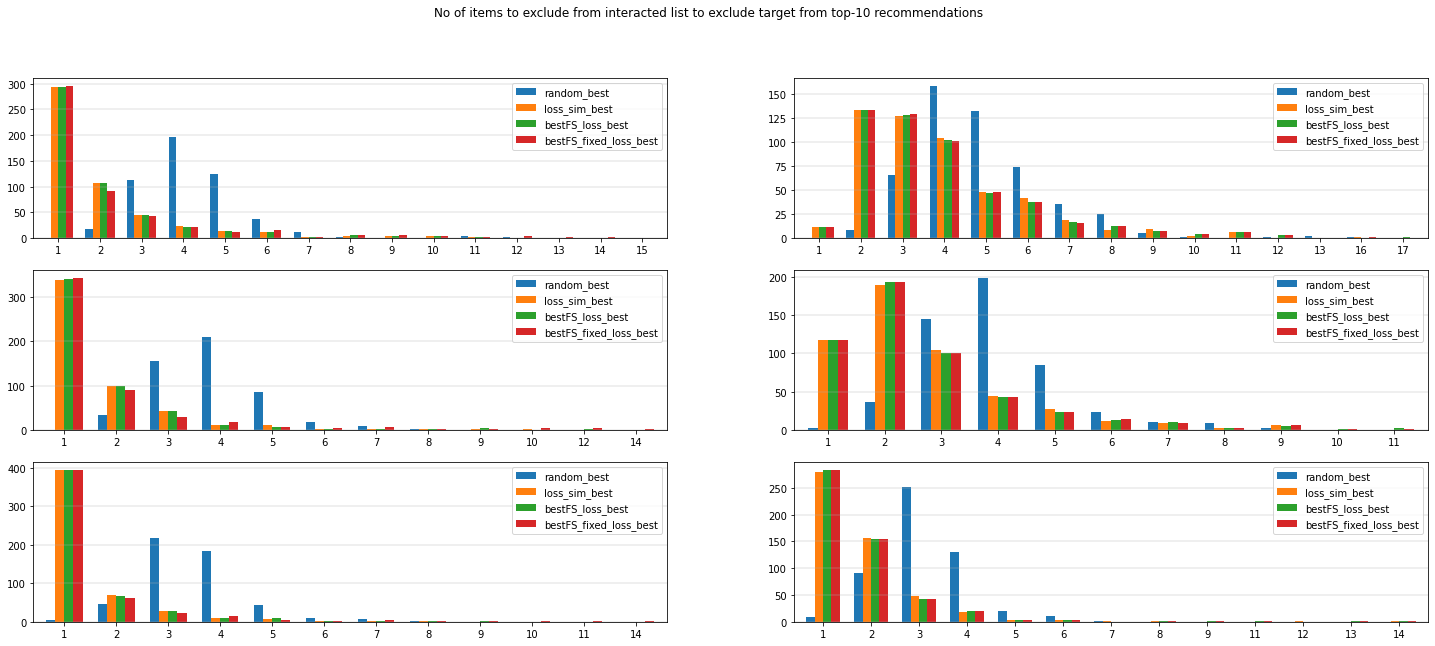

In [318]:
rows, cols = 3, 2
fig, axs = plt.subplots(rows, cols, figsize=(25, 10))

for col in range(cols):
    for pos, row in zip([3, 5, 7], range(rows)):
        df = pd.DataFrame.from_dict({
            'random_best': cnt[pos][f'random_{col}'][1],
#             'loss_sim_init': cnt[pos][f'yloss_{col}'][0],
            'loss_sim_best': cnt[pos][f'yloss_{col}'][1],
#             'bestFS_loss_init': cnt[pos][f'bestFS_yloss_{col}'][0],
            'bestFS_loss_best': cnt[pos][f'bestFS_yloss_{col}'][1],
#             'bestFS_fixed_loss_init': cnt[pos][f'bestFS_fixed_yloss_{col}'][0],
            'bestFS_fixed_loss_best': cnt[pos][f'bestFS_fixed_yloss_{col}'][1],
        }, orient='columns')
        df.sort_index().plot.bar(ax=axs[row][col], rot=0, width=0.7).grid(axis='y', linewidth=0.4)

plt.suptitle('No of items to exclude from interacted list to exclude target from top-10 recommendations')

Text(0.5, 0.98, 'Cumulative no of items to exclude from interacted list to exclude target from top-10 recommendations')

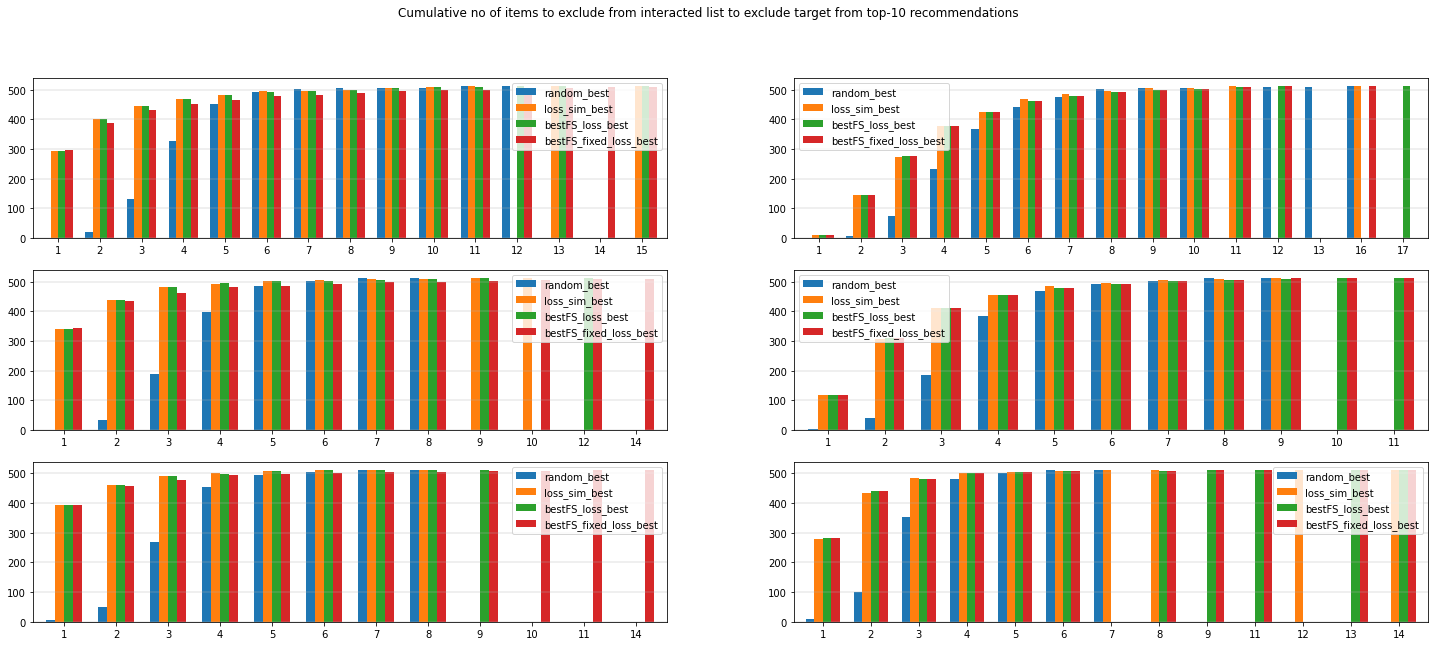

In [319]:
rows, cols = 3, 2
fig, axs = plt.subplots(rows, cols, figsize=(25, 10))

for col in range(cols):
    for pos, row in zip([3, 5, 7], range(rows)):

        df = pd.DataFrame.from_dict({
            'random_best': cnt[pos][f'random_{col}'][1],
#             'loss_sim_init': cnt[pos][f'yloss_{col}'][0],
            'loss_sim_best': cnt[pos][f'yloss_{col}'][1],
#             'bestFS_loss_init': cnt[pos][f'bestFS_yloss_{col}'][0],
            'bestFS_loss_best': cnt[pos][f'bestFS_yloss_{col}'][1],
#             'bestFS_fixed_loss_init': cnt[pos][f'bestFS_fixed_yloss_{col}'][0],
            'bestFS_fixed_loss_best': cnt[pos][f'bestFS_fixed_yloss_{col}'][1],
        }, orient='columns')
        df.sort_index().cumsum().plot.bar(ax=axs[row][col], rot=0, width=0.7).grid(axis='y', linewidth=0.4)

plt.suptitle('Cumulative no of items to exclude from interacted list to exclude target from top-10 recommendations')

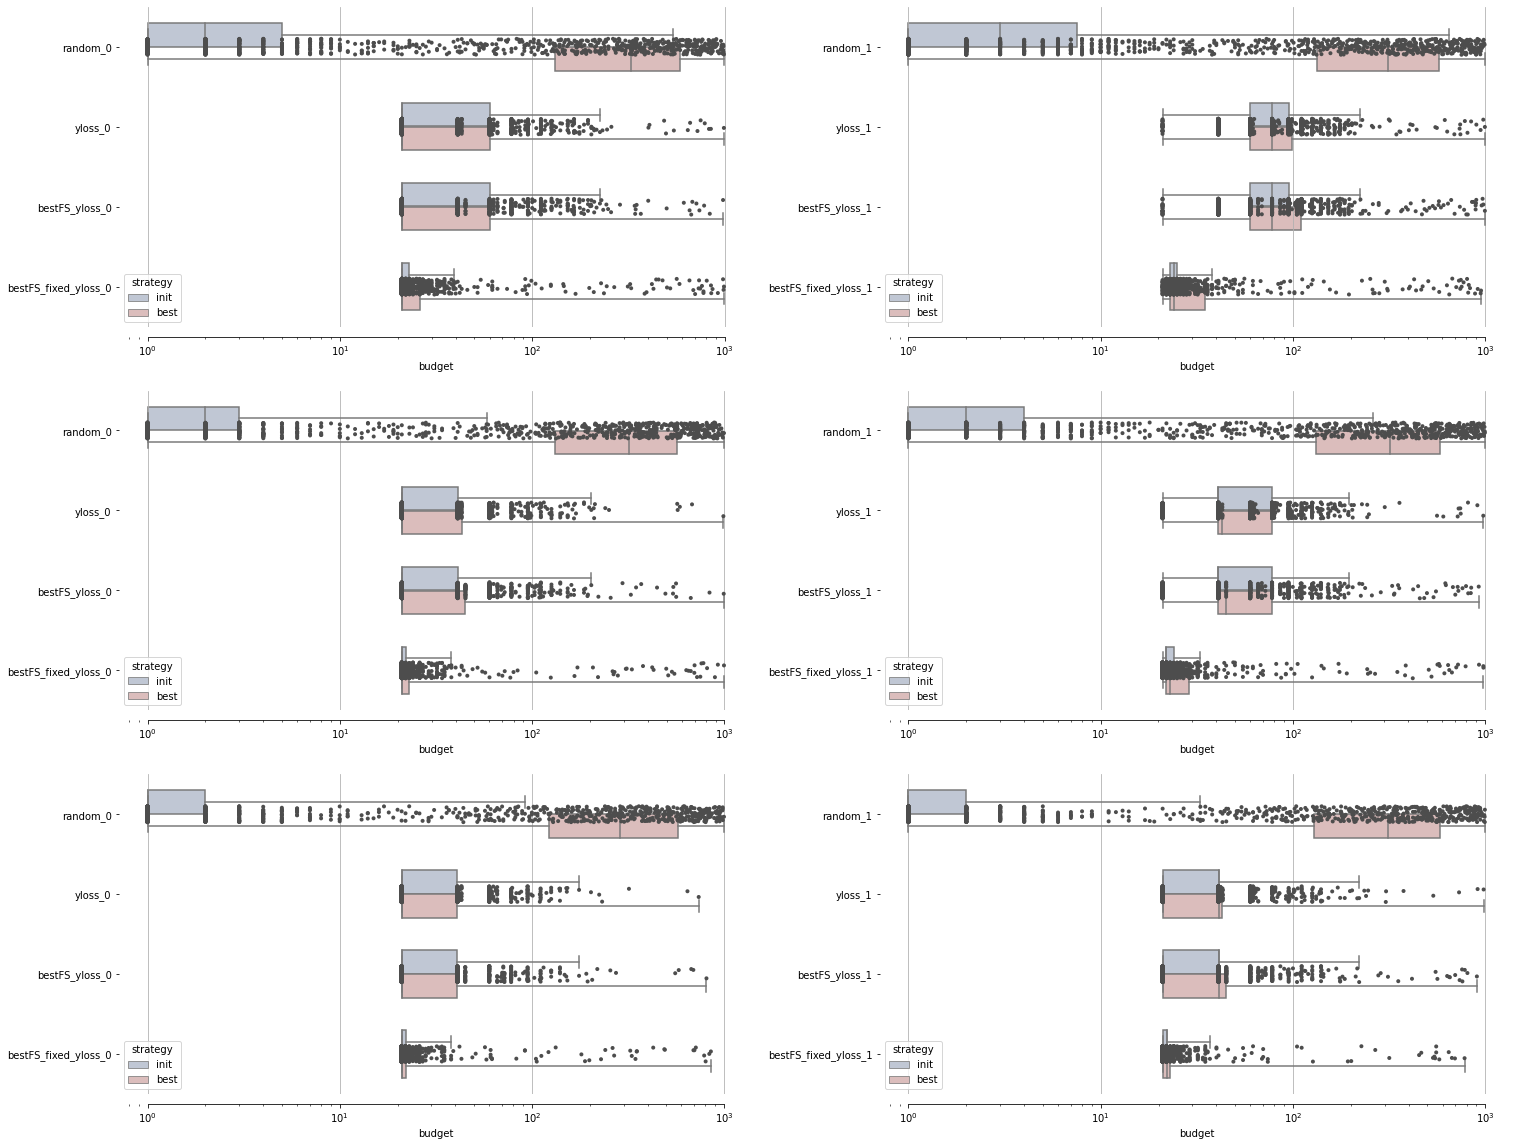

In [329]:
# sns.set_theme(style="ticks")
strategies = [('init', 2), ('best', 3)]
# pos = [2]
# strategies = ['init']
cnames = ['method', 'strategy', 'budget']

# Initialize the figure with a logarithmic x axis
# f, ax = plt.subplots(3, 1, figsize=(20, 20))
rows, cols = 3, 2
fig, axs = plt.subplots(rows, cols, figsize=(25, 20))

for col in range(cols):
    for pos, row in zip([3, 5, 7], range(rows)):

        df = pd.DataFrame.from_records(
            list(itertools.chain(*(
                zip(itertools.repeat(k), itertools.repeat(t[0]), v[t[1]])
                for k, v in cnt[pos].items() if f'_{col}' in k
                for t in strategies
            ))), columns=cnames
        )

        # Plot the orbital period with horizontal boxes
        sns.boxplot(x='budget', y='method', hue='strategy', data=df,
                    whis=[0, 100], width=.6, palette="vlag", ax=axs[row][col])

        # Add in points to show each observation
        sns.stripplot(x='budget', y='method', data=df,
                      size=4, color=".3", linewidth=0, ax=axs[row][col])


        # Tweak the visual presentation
        axs[row][col].set_xscale("log")
        axs[row][col].xaxis.grid(True)
        axs[row][col].set(ylabel="")

# ------------------------------------------------------------

sns.despine(trim=True, offset=10, left=True)

## Top Down Searching

In [330]:
from collections import Counter


# cnt = dict.fromkeys(most_sim_cfs.keys())
# no_target_achieved_cases = dict.fromkeys(most_sim_cfs.keys())
cnt = defaultdict(dict)
no_target_achieved_cases = defaultdict(list)

for i in range(2):
    cnt, no_target_achieved_cases = convert_res_to_lists(random_cfs[i], cnt, no_target_achieved_cases, f'random_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(yloss_sim_cfs[i], cnt, no_target_achieved_cases, f'yloss_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(topdown_bestfs_yloss_cfs[i], cnt, no_target_achieved_cases, f'topdown_yloss_{i}')

Text(0.5, 0.98, 'No of items to exclude from interacted list to exclude target from top-10 recommendations')

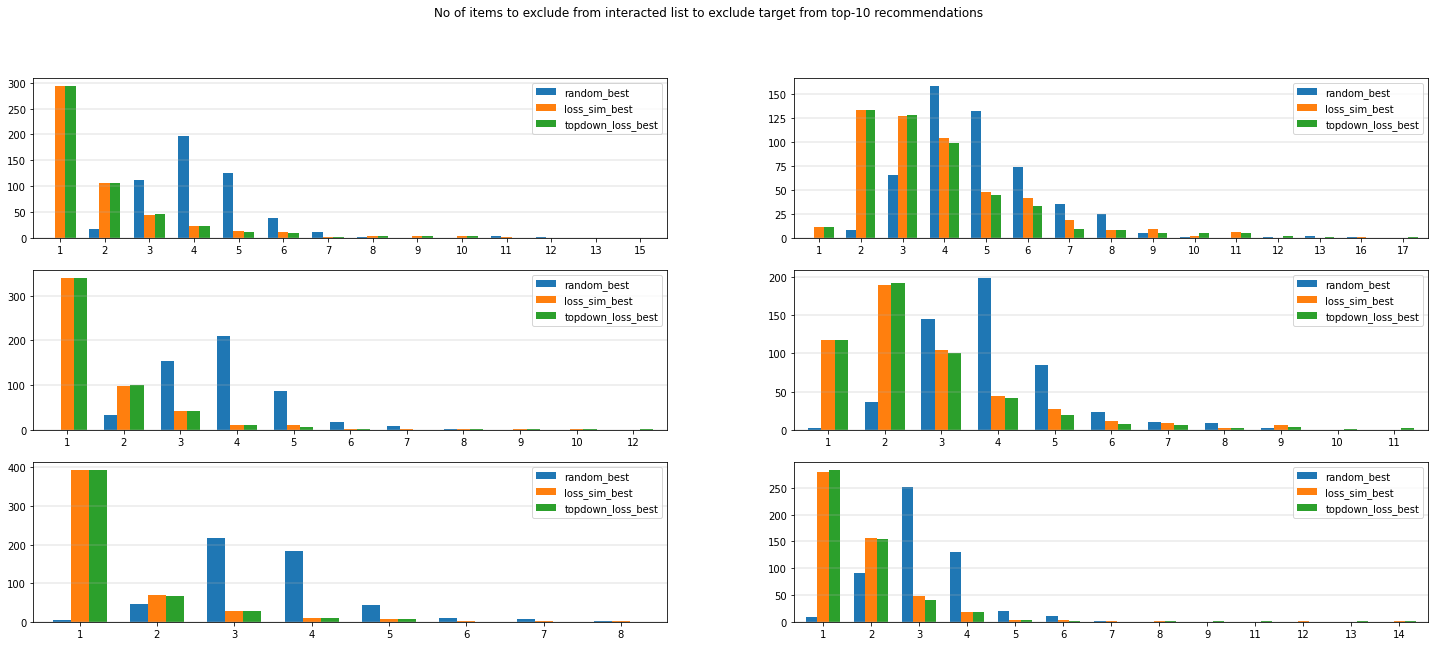

In [331]:
rows, cols = 3, 2
fig, axs = plt.subplots(rows, cols, figsize=(25, 10))

for col in range(cols):
    for pos, row in zip([3, 5, 7], range(rows)):
        df = pd.DataFrame.from_dict({
            'random_best': cnt[pos][f'random_{col}'][1],
#             'loss_sim_init': cnt[pos][f'yloss_{col}'][0],
            'loss_sim_best': cnt[pos][f'yloss_{col}'][1],
#             'topdown_loss_init': cnt[pos][f'topdown_yloss_{col}'][0],
            'topdown_loss_best': cnt[pos][f'topdown_yloss_{col}'][1],
        }, orient='columns')
        df.sort_index().plot.bar(ax=axs[row][col], rot=0, width=0.7).grid(axis='y', linewidth=0.4)

plt.suptitle('No of items to exclude from interacted list to exclude target from top-10 recommendations')

Text(0.5, 0.98, 'Cumulative no of items to exclude from interacted list to exclude target from top-10 recommendations')

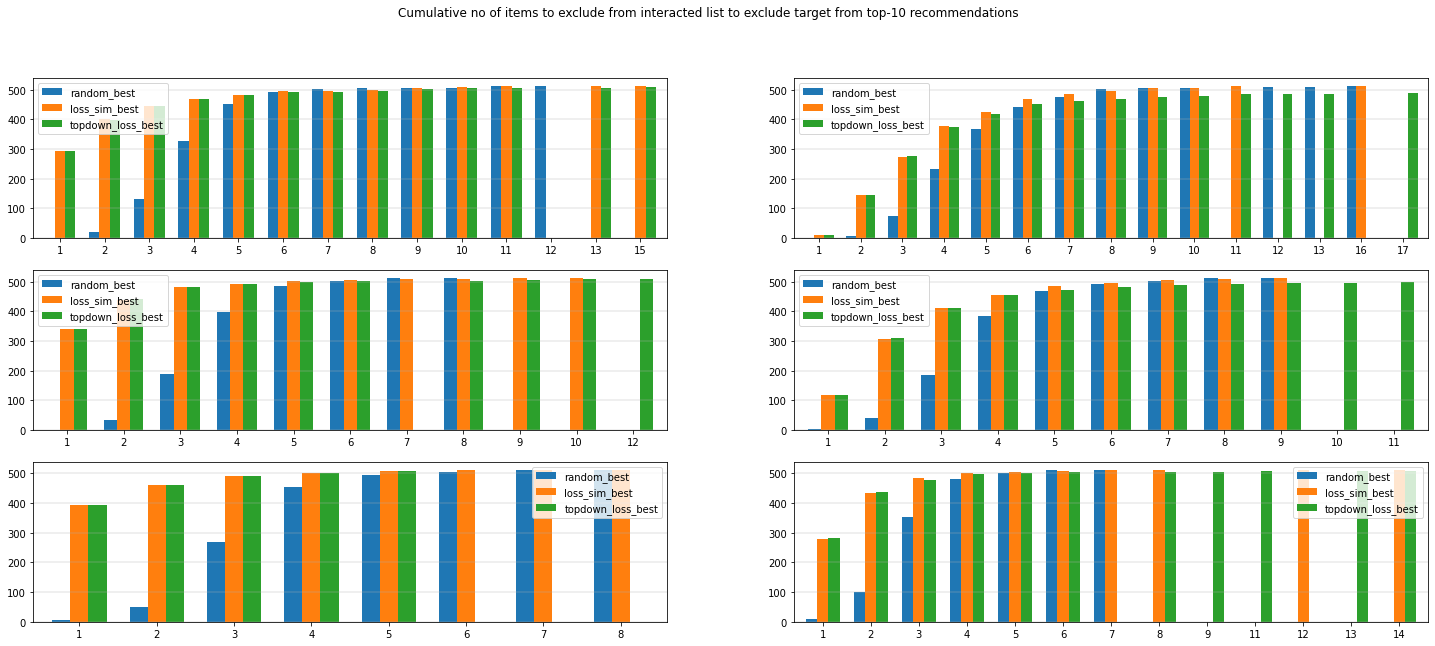

In [334]:
rows, cols = 3, 2
fig, axs = plt.subplots(rows, cols, figsize=(25, 10))

for col in range(cols):
    for pos, row in zip([3, 5, 7], range(rows)):

        df = pd.DataFrame.from_dict({
            'random_best': cnt[pos][f'random_{col}'][1],
#             'loss_sim_init': cnt[pos][f'yloss_{col}'][0],
            'loss_sim_best': cnt[pos][f'yloss_{col}'][1],
#             'topdown_loss_init': cnt[pos][f'topdown_yloss_{col}'][0],
            'topdown_loss_best': cnt[pos][f'topdown_yloss_{col}'][1],
        }, orient='columns')
        df.sort_index().cumsum().plot.bar(ax=axs[row][col], rot=0, width=0.7).grid(axis='y', linewidth=0.4)

plt.suptitle('Cumulative no of items to exclude from interacted list to exclude target from top-10 recommendations')

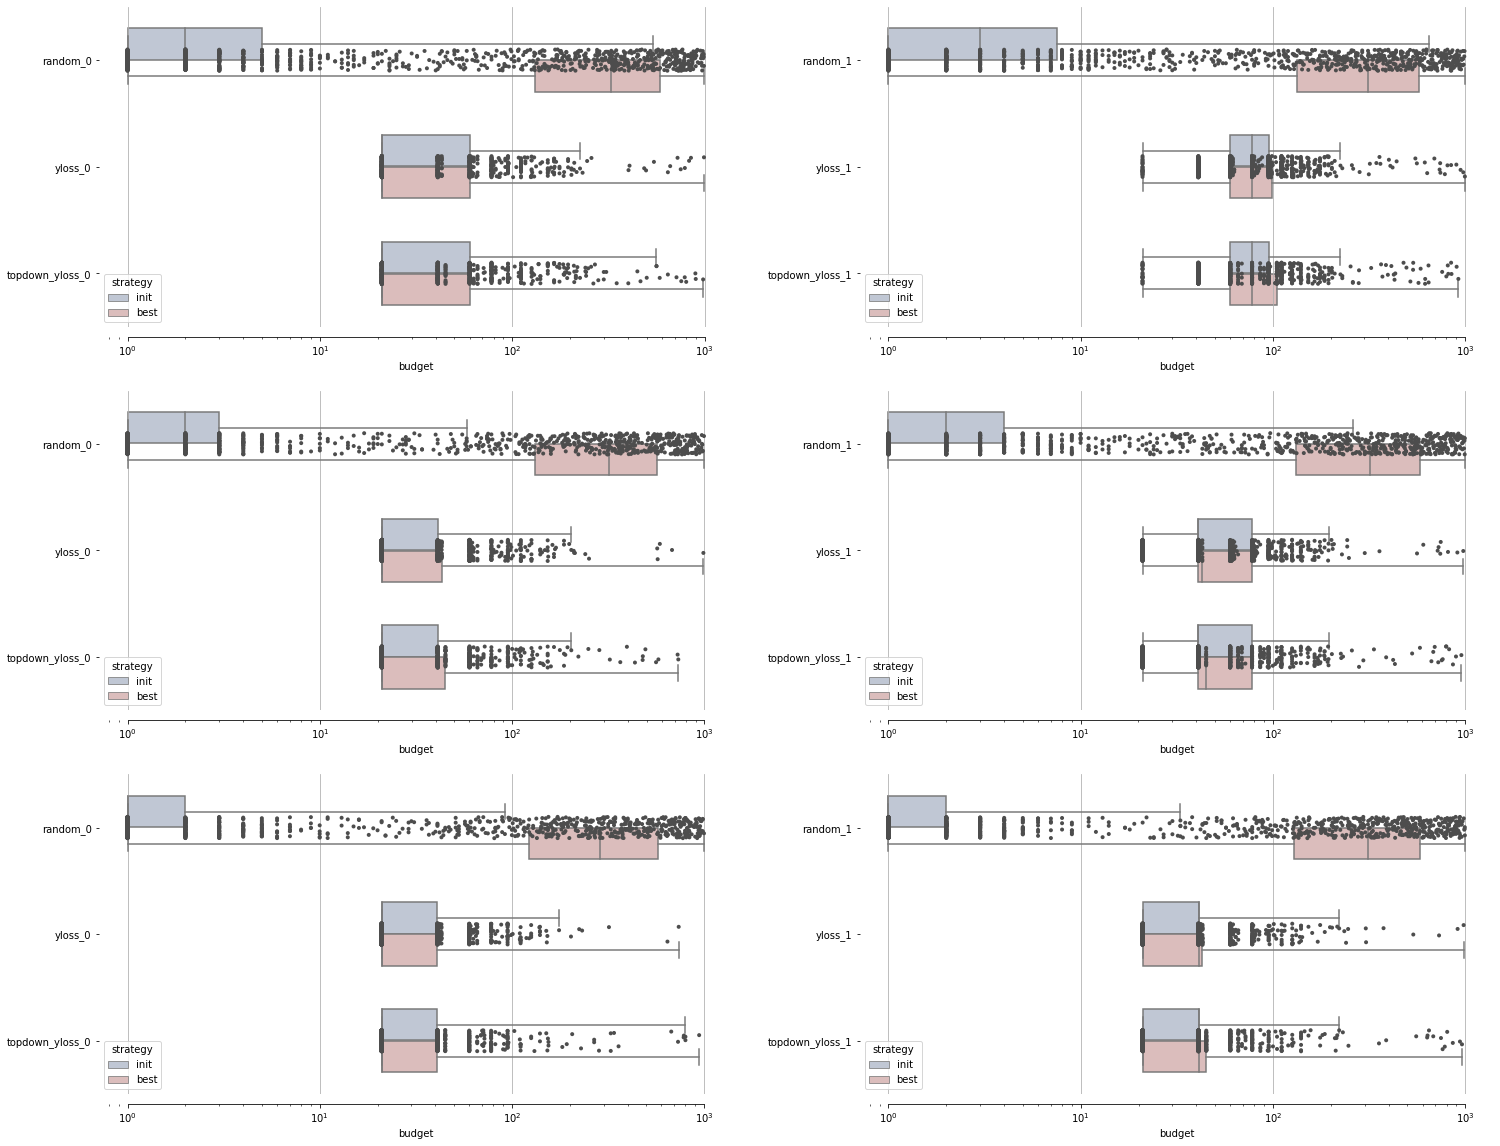

In [336]:
# sns.set_theme(style="ticks")

strategies = [('init', 2), ('best', 3)]
# pos = [2]
# strategies = ['init']
cnames = ['method', 'strategy', 'budget']

# Initialize the figure with a logarithmic x axis
# f, ax = plt.subplots(3, 1, figsize=(20, 20))
rows, cols = 3, 2
fig, axs = plt.subplots(rows, cols, figsize=(25, 20))

for col in range(cols):
    for pos, row in zip([3, 5, 7], range(rows)):
        df = pd.DataFrame.from_records(
            list(itertools.chain(*(
                zip(itertools.repeat(k), itertools.repeat(t[0]), v[t[1]])
                for k, v in cnt[pos].items() if f'_{col}' in k
                for t in strategies
            ))), columns=cnames
        )

        # Plot the orbital period with horizontal boxes
        sns.boxplot(x='budget', y='method', hue='strategy', data=df,
                    whis=[0, 100], width=.6, palette="vlag", ax=axs[row][col])

        # Add in points to show each observation
        sns.stripplot(x='budget', y='method', data=df,
                      size=4, color=".3", linewidth=0, ax=axs[row][col])


        # Tweak the visual presentation
        axs[row][col].set_xscale("log")
        axs[row][col].xaxis.grid(True)
        axs[row][col].set(ylabel="")

# ------------------------------------------------------------

sns.despine(trim=True, offset=10, left=True)

# Checking various thresholds for budget

## Random

In [78]:
from collections import Counter


# cnt = dict.fromkeys(most_sim_cfs.keys())
# no_target_achieved_cases = dict.fromkeys(most_sim_cfs.keys())
cnt = defaultdict(dict)
no_target_achieved_cases = defaultdict(list)

for i in range(1):
    cnt, no_target_achieved_cases = convert_res_to_lists(random_cfs[i], cnt, no_target_achieved_cases, f'random_{i}')
#     cnt, no_target_achieved_cases = convert_res_to_lists(embedding_sim_cfs[i], cnt, no_target_achieved_cases, f'embeddings_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(bfs_yloss_cfs[i], cnt, no_target_achieved_cases, f'bfs_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(dfs_yloss_cfs[i], cnt, no_target_achieved_cases, f'dfs_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(bestfs_yloss_cfs[i], cnt, no_target_achieved_cases, f'bestfs_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(bidirectional_cfs[i], cnt, no_target_achieved_cases, f'bidirectional_0_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(bidirectional_cfs[i + 1], cnt, no_target_achieved_cases, f'bidirectional_01_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(bidirectional_cfs[i + 2], cnt, no_target_achieved_cases, f'bidirectional_05_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(brute_force_cfs[i], cnt, no_target_achieved_cases, f'brute_force_{i}')

In [79]:
methods = ['random', 'bfs', 'dfs', 'bestfs', 'bidirectional_0', 'bidirectional_01', 'bidirectional_05']

Text(0.5, 0.98, '200/500 budget - No of items to delete in order to have target out of top-10 recommendations')

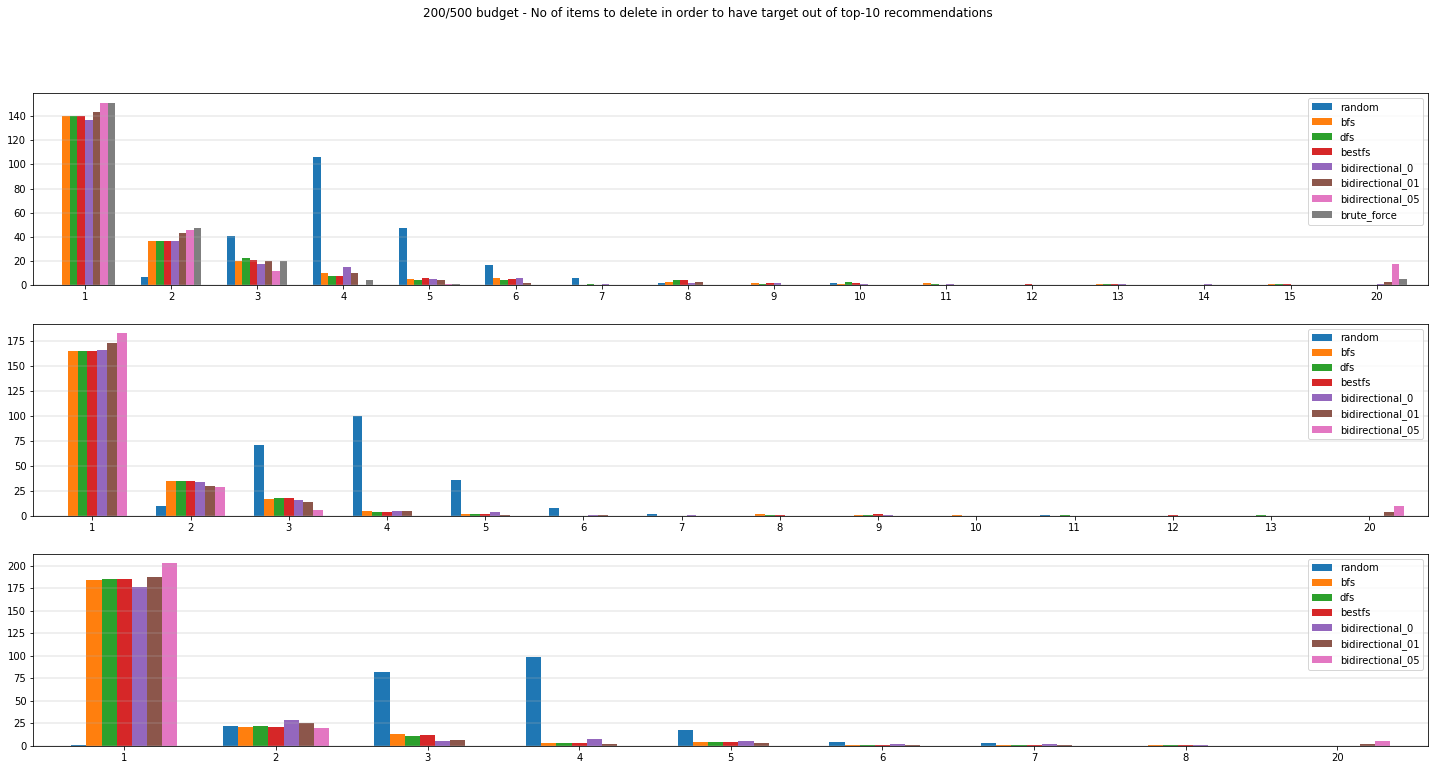

In [80]:
rows, cols = 3, 1
fig, axs = plt.subplots(rows, cols, figsize=(25, 12))

for col in range(cols):
    for pos, row in zip([3, 5, 7], range(rows)):
        methods_enhanced = methods + ['brute_force'] if pos==3 else methods
        df = pd.DataFrame.from_dict({
            m: cnt[pos][f'{m}_{col}'][1] for m in methods_enhanced
        }, orient='columns')
        df.sort_index().plot.bar(ax=axs[row], rot=0, width=0.7).grid(axis='y', linewidth=0.4)

plt.suptitle('200/500 budget - No of items to delete in order to have target out of top-10 recommendations')

Text(0.5, 0.98, 'Cumulative no of items to exclude from interacted list to exclude target from top-10 recommendations')

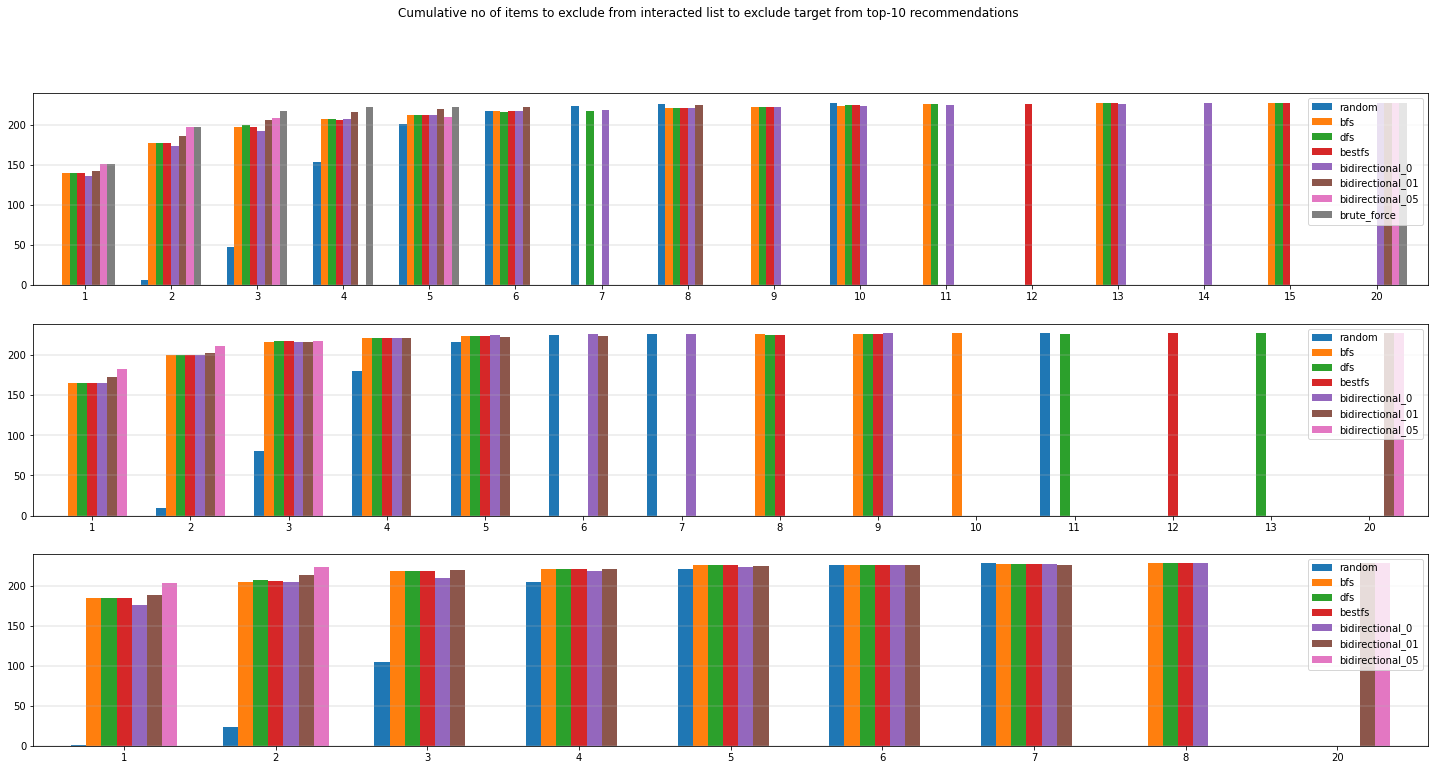

In [81]:
rows, cols = 3, 1
fig, axs = plt.subplots(rows, cols, figsize=(25, 12))

for col in range(cols):
    for pos, row in zip([3, 5, 7], range(rows)):
        methods_enhanced = methods + ['brute_force'] if pos==3 else methods
        df = pd.DataFrame.from_dict({
            m: cnt[pos][f'{m}_{col}'][1] for m in methods_enhanced
        }, orient='columns')
        df.sort_index().cumsum().plot.bar(ax=axs[row], rot=0, width=0.7).grid(axis='y', linewidth=0.4)

        rects = axs[row].patches

        # Make some labels.
        labels = [i for i in range(len(rects))]

#         for rect, label in zip(rects, labels):
#             height = rect.get_height()
#             axs[row].text(rect.get_x() + rect.get_width() / 2, height + 5, label,
#                     ha='center', va='bottom')

plt.suptitle('Cumulative no of items to exclude from interacted list to exclude target from top-10 recommendations')

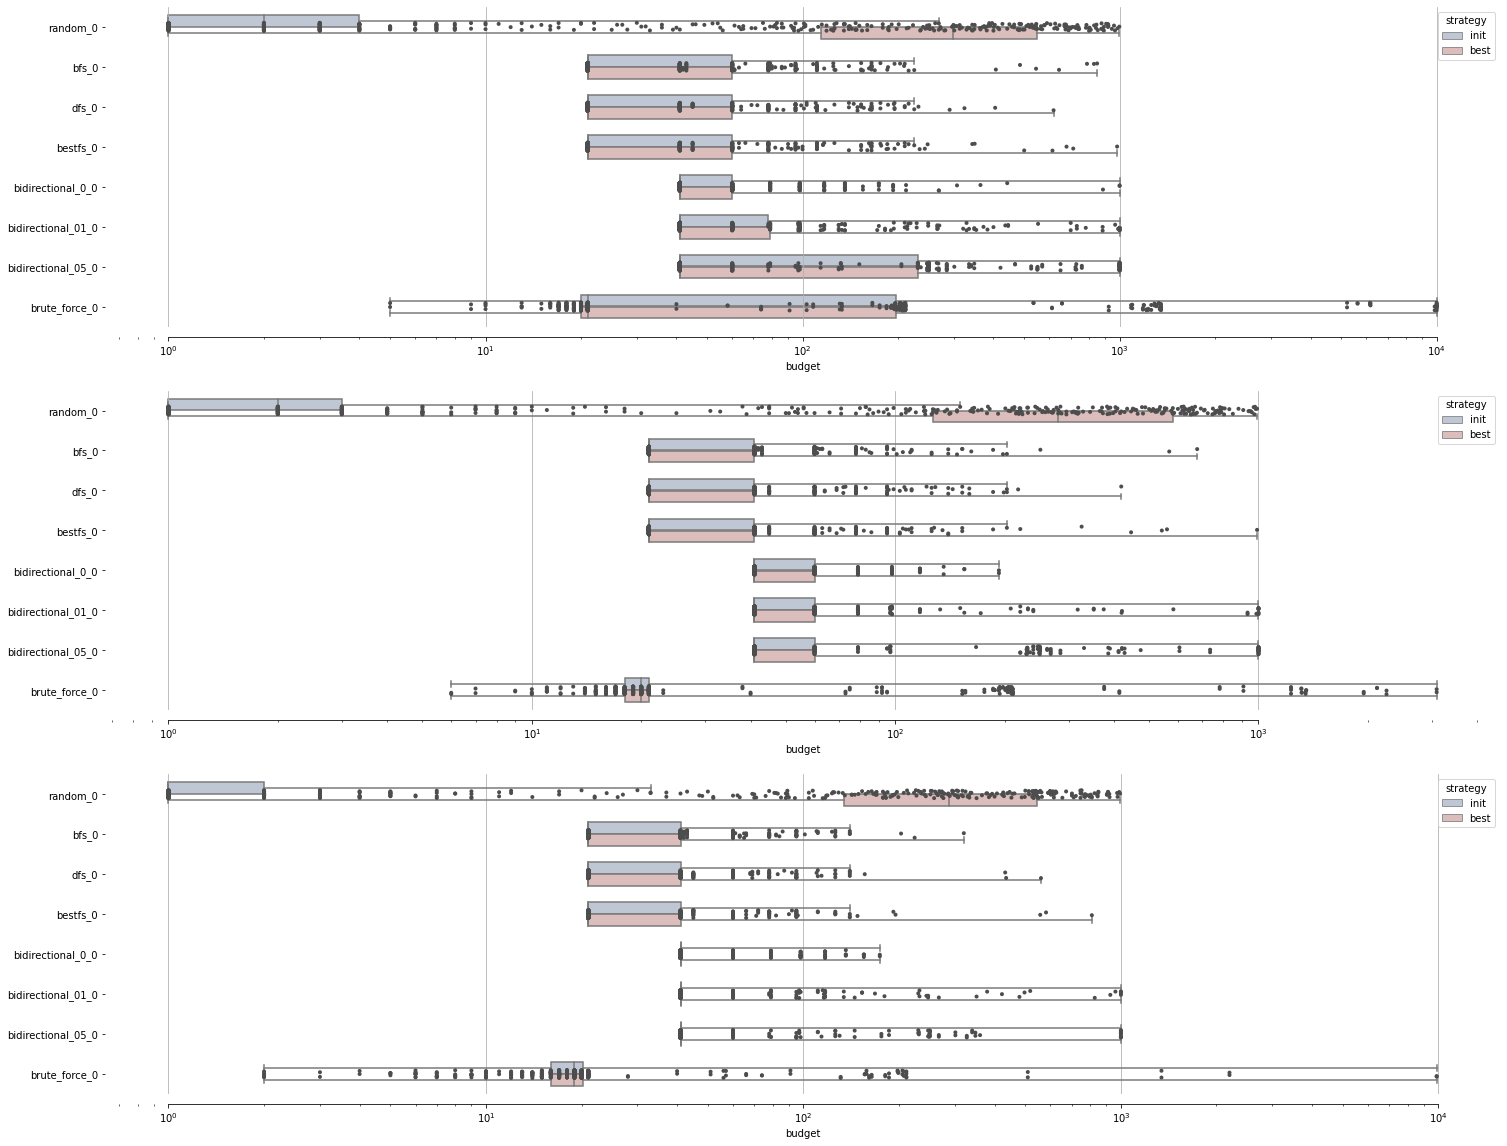

In [82]:
# sns.set_theme(style="ticks")
strategies = [('init', 2), ('best', 3)]
# pos = [2]
# strategies = ['init']
cnames = ['method', 'strategy', 'budget']

# Initialize the figure with a logarithmic x axis
# f, ax = plt.subplots(3, 1, figsize=(20, 20))
rows, cols = 3, 1
fig, axs = plt.subplots(rows, cols, figsize=(25, 20))

for col in range(cols):
    for pos, row in zip([3, 5, 7], range(rows)):

        df = pd.DataFrame.from_records(
            list(itertools.chain(*(
                zip(itertools.repeat(k), itertools.repeat(t[0]), v[t[1]])
                for k, v in cnt[pos].items() if f'_{col}' in k
                for t in strategies
            ))), columns=cnames
        )

        # Plot the orbital period with horizontal boxes
        sns.boxplot(x='budget', y='method', hue='strategy', data=df,
                    whis=[0, 100], width=.6, palette="vlag", ax=axs[row])

        # Add in points to show each observation
        sns.stripplot(x='budget', y='method', data=df,
                      size=4, color=".3", linewidth=0, ax=axs[row])

        # Tweak the visual presentation
        axs[row].set_xscale("log")
        axs[row].xaxis.grid(True)
        axs[row].set(ylabel="")

sns.despine(trim=True, offset=10, left=True)

# Various plots

In [32]:
dcts = [random_cfs, most_sim_cfs]
strategies = ['R', 'MSim']

dfs = [
    pd.DataFrame([[
        k, i.solution_found, i.iter_no['initial'], i.iter_no['best'], i.loss['initial'], i.loss['best'], i.cfs_dist, i.pos, s]
        for k, v in dct.items() for items in v for i in items if i is not None
    ]) for dct, s in zip(dcts, strategies)
]

cols = {'columns': {
    '0_x': f'init_target_pos_{strategies[0]}', '1_x': f'is_solved_{strategies[0]}',
    '2_x': f'init_iter_{strategies[0]}', '3_x': f'best_iter_{strategies[0]}',
    '4_x': f'init_loss_{strategies[0]}', '5_x': f'best_loss_{strategies[0]}',
    '6_x': f'iitems_del_{strategies[0]}', '7_x': f'f_target_pos_{strategies[0]}', '8_x': 'strategy',
    '0_y': f'init_target_pos_{strategies[1]}', '1_y': f'is_solved_{strategies[1]}',
    '2_y': f'init_iter_{strategies[1]}', '3_y': f'best_iter_{strategies[1]}',
    '4_y': f'init_loss_{strategies[1]}', '5_y': f'best_loss_{strategies[1]}',
    '6_y': f'iitems_del_{strategies[1]}', '7_y': f'f_target_pos_{strategies[1]}', '8_y': 'strategy'
}}
df = pd.merge(dfs[0], dfs[1], left_index=True, right_index=True).reset_index().rename(**cols)

In [33]:
def plot_data(x, y, ax, title):
    # calculate the max values to annotate on the plot
    y_max = y.max()

    # find the index of the max value
    x_ind = np.where(y == y_max)

    # find the x based on the index of max
    x_max = x.iloc[x_ind]
    # ----------------------------------------------------------------------------------------------------
    # plot the data
    ax.plot(x, y, color = "black")
    ax.scatter(x_max, np.tile(y_max, len(x_max)), s = 300, color = "green", alpha = 0.3)

    # annotate the text of the Max value
#     ax.annotate(r'Max value',
#                  xy = (x_max, y_max),
#                  xytext = (-90, -50),
#                  textcoords = 'offset points',
#                  fontsize = 16,
#                  arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3,rad=.2")
#                )
    # ----------------------------------------------------------------------------------------------------
    # prettify the plot
    # fill the area with a specific color
    ax.fill_between(x, 0, y, where = 0 > y, facecolor='red', interpolate = True, alpha = 0.3)
    ax.fill_between(x, 0, y, where = 0 <= y, facecolor='green', interpolate = True, alpha = 0.3)

    # change the ylim to make it more pleasant for the viewer
    ax.set_ylim(y.min() * 1.1, y.max() * 1.1)

    # change the values of the x axis
    # extract the first 3 letters of the month
    # xtickvals = [str(m)[:3].upper() + "-" + str(y) for y,m in zip(df.date_converted.dt.year, df.date_converted.dt.month_name())]

    # this way we can set the ticks to be every 6 months.
    ax.set_xticks(x[::50])

    # change the current ticks to be our string month value
    # basically pass from this: 1967-07-01
    # to this: JUL-1967
    # ax.set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})

    # add a grid
    ax.grid(alpha = 0.3)

    # set the title
    # ax.set_title("Monthly variation return %");
    ax.set_title(title);

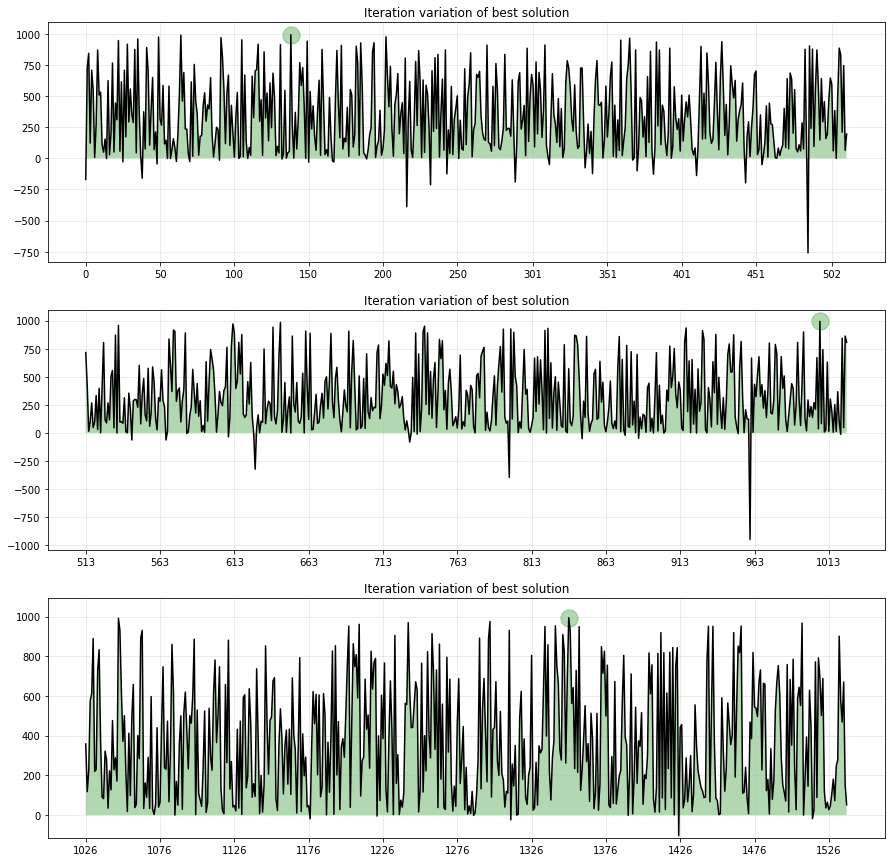

In [34]:
# instanciate the figure
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

# prepare the data for plotting
df["iter_diff"] = (df["best_iter_R"] - df["best_iter_MSim"])

# filter our df for a specific target_pos
tmp_df = df[(df["init_target_pos_R"] == 3) & (df["is_solved_R"])]

# separate x and y 
x = tmp_df['index']
y = tmp_df["iter_diff"]

plot_data(x, y, ax[0], "Iteration variation of best solution")

# ----------------------------------------------------------------------------------------------------

# filter our df for a specific target_pos
tmp_df = df[(df["init_target_pos_R"] == 5) & (df["is_solved_R"])]
# del tmp_df['index']
# tmp_df.reset_index(inplace=True, drop=True)
# tmp_df.reset_index(inplace=True)

# separate x and y 
x = tmp_df['index']
y = tmp_df["iter_diff"]

plot_data(x, y, ax[1], "Iteration variation of best solution")

# ----------------------------------------------------------------------------------------------------

# filter our df for a specific target_pos
tmp_df = df[(df["init_target_pos_R"] == 7) & (df["is_solved_R"])]

# separate x and y 
x = tmp_df['index']
y = tmp_df["iter_diff"]

plot_data(x, y, ax[2], "Iteration variation of best solution")

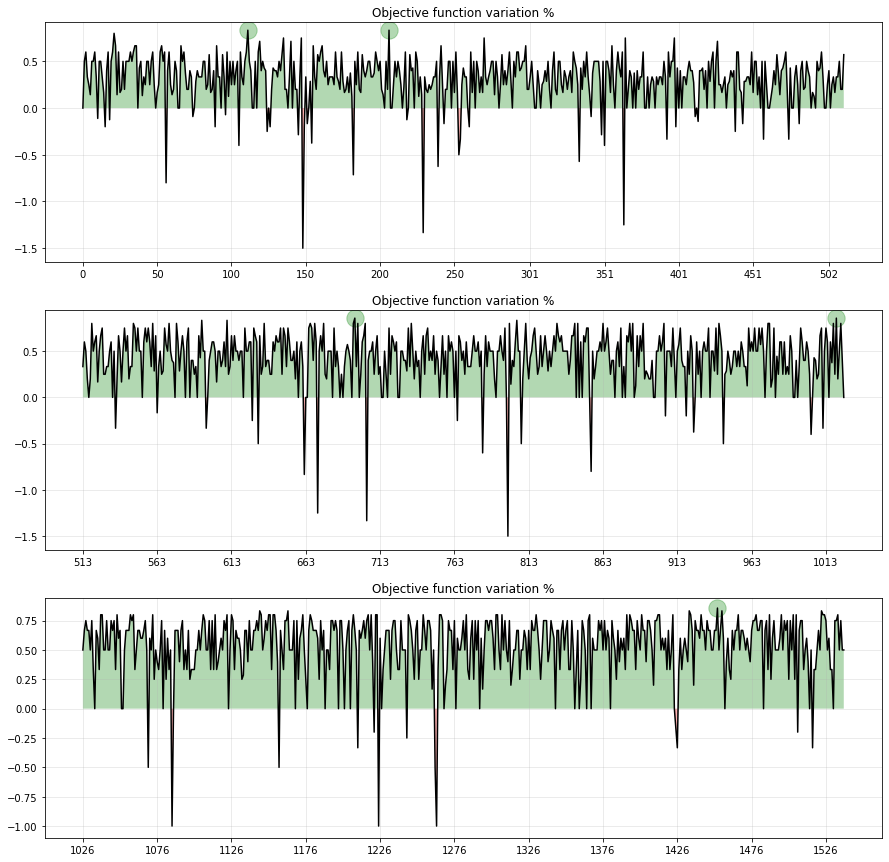

In [35]:
# # instanciate the figure
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

# prepare the data for plotting
df["loss_diff"] = (df["best_loss_R"] - df["best_loss_MSim"]) / df['best_loss_R']

# filter our df for a specific target_pos
tmp_df = df[(df["init_target_pos_R"] == 3) & (df["is_solved_R"])]

# separate x and y 
x = tmp_df['index']
y = tmp_df["loss_diff"]

plot_data(x, y, ax[0], "Objective function variation %")

# ----------------------------------------------------------------------------------------------------

# filter our df for a specific target_pos
tmp_df = df[(df["init_target_pos_R"] == 5) & (df["is_solved_R"])]

# separate x and y 
x = tmp_df['index']
y = tmp_df["loss_diff"]

plot_data(x, y, ax[1], "Objective function variation %")

# ----------------------------------------------------------------------------------------------------

# filter our df for a specific target_pos
tmp_df = df[(df["init_target_pos_R"] == 7) & (df["is_solved_R"])]

# separate x and y 
x = tmp_df['index']
y = tmp_df["loss_diff"]

plot_data(x, y, ax[2], "Objective function variation %")

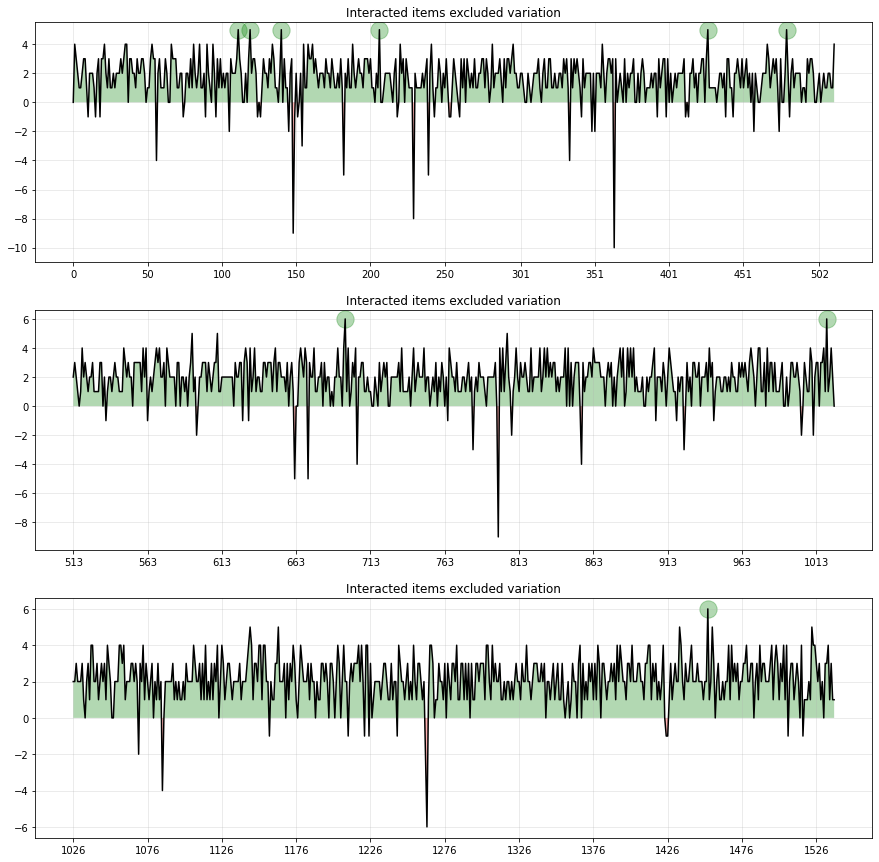

In [36]:
# instanciate the figure
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

# prepare the data for plotting
df["excluded_items_diff"] = (df["iitems_del_R"] - df["iitems_del_MSim"])

# filter our df for a specific target_pos
tmp_df = df[(df["init_target_pos_R"] == 3) & (df["is_solved_R"])]

# separate x and y 
x = tmp_df['index']
y = tmp_df["excluded_items_diff"]

plot_data(x, y, ax[0], "Interacted items excluded variation")

# ----------------------------------------------------------------------------------------------------

# filter our df for a specific target_pos
tmp_df = df[(df["init_target_pos_R"] == 5) & (df["is_solved_R"])]

# del tmp_df['index']
# tmp_df.reset_index(inplace=True, drop=True)
# tmp_df.reset_index(inplace=True)

# separate x and y 
x = tmp_df['index']
y = tmp_df["excluded_items_diff"]

plot_data(x, y, ax[1], "Interacted items excluded variation")

# ----------------------------------------------------------------------------------------------------

# filter our df for a specific target_pos
tmp_df = df[(df["init_target_pos_R"] == 7) & (df["is_solved_R"])]
# del tmp_df['index']
# tmp_df.reset_index(inplace=True, drop=True)
# tmp_df.reset_index(inplace=True)

# separate x and y 
x = tmp_df['index']
y = tmp_df["excluded_items_diff"]

plot_data(x, y, ax[2], "Interacted items excluded variation")

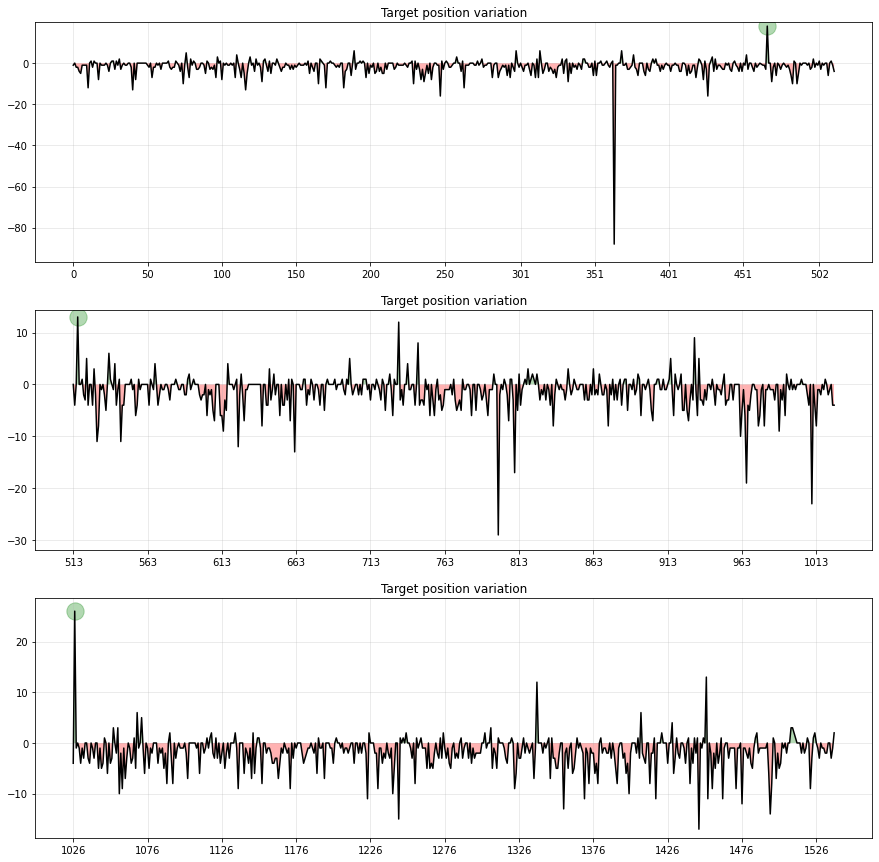

In [37]:
# instanciate the figure
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

# prepare the data for plotting
df["tpos_diff"] = (df["f_target_pos_R"] - df["f_target_pos_MSim"])

# filter our df for a specific target_pos
tmp_df = df[(df["init_target_pos_R"] == 3) & (df["is_solved_R"])]

# separate x and y
x = tmp_df['index']
y = tmp_df["tpos_diff"]

plot_data(x, y, ax[0], "Target position variation")

# ----------------------------------------------------------------------------------------------------

# filter our df for a specific target_pos
tmp_df = df[(df["init_target_pos_R"] == 5) & (df["is_solved_R"])]

# separate x and y 
x = tmp_df['index']
y = tmp_df["tpos_diff"]

plot_data(x, y, ax[1], "Target position variation")

# ----------------------------------------------------------------------------------------------------

# filter our df for a specific target_pos
tmp_df = df[(df["init_target_pos_R"] == 7) & (df["is_solved_R"])]

# separate x and y 
x = tmp_df['index']
y = tmp_df["tpos_diff"]

plot_data(x, y, ax[2], "Target position variation")

In [52]:


# fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
# fig.show()

fig = go.FigureWidget()
bar = fig.add_bar(x=['x', '1-x'])
fig.layout = dict(yaxis=dict(range=[0,1]), height=600)

@interact(x=(0, 1, 0.01))
def update(x=0.3):
    with fig.batch_update():
        bar.y=[x, 1-x]
fig

interactive(children=(FloatSlider(value=0.3, description='x', max=1.0, step=0.01), Output()), _dom_classes=('w…

FigureWidget({
    'data': [{'type': 'bar', 'uid': 'b63f4f8f-5256-4191-b2ae-fb6a344e378f', 'x': ['x', '1-x']}]…

# Advanced plotting

In [27]:
from collections import Counter


# cnt = dict.fromkeys(most_sim_cfs.keys())
# no_target_achieved_cases = dict.fromkeys(most_sim_cfs.keys())
cnt = defaultdict(dict)
no_target_achieved_cases = defaultdict(list)

for i in range(2):
    cnt, no_target_achieved_cases = convert_res_to_lists(yloss_sim_cfs[i], cnt, no_target_achieved_cases, f'bfs_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(dfs_yloss_sim_cfs[i], cnt, no_target_achieved_cases, f'dfs_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(bestfs_yloss_cfs[i], cnt, no_target_achieved_cases, f'bestfs_{i}')

In [30]:
# sns.set_theme(style="ticks")
strategies = [('init', 2), ('best', 3)]
# pos = [2]
# strategies = ['init']
custom_range = [7, 27]
# cnames = ['user_id', 'method'] + [f'card_{str(idx + 1)}' for idx in range(custom_range[1] - custom_range[0])]
cnames = ['user_id', 'method', 'budget', 'cardinality']

# Initialize the figure with a logarithmic x axis
# f, ax = plt.subplots(3, 1, figsize=(20, 20))
rows, cols = 1, 1
# fig, axs = plt.subplots(rows, cols, figsize=(25, 20))

for col in range(cols):
    for pos, row in zip([3], range(rows)):

        df = pd.DataFrame.from_records(
            list(itertools.chain(*(
#                 zip(v[6], itertools.repeat(k), *[v[i] for i in range(custom_range[0], custom_range[1])])
#                 for k, v in cnt[pos].items() if f'_{col}' in k
                zip(v[6], itertools.repeat(k), v[i], itertools.repeat(i - custom_range[0] + 1))
                for k, v in cnt[pos].items() if f'_{col}' in k
                for i in range(custom_range[0], custom_range[1])
            ))), columns=cnames
        )

In [264]:
methods = ['bfs_0', 'dfs_0', 'bestfs_0']

easy = [0, 7]
medium = [7, 13]
difficult = [13, 20]

for m in methods:
    restrictions = (df['method']==m) & (df['budget']>0)

    g = df[restrictions].groupby(['budget','cardinality'])['budget']
    df.loc[restrictions, 'times'] = g.transform('count')

    g = df[restrictions].groupby(['user_id'])['cardinality']
    df.loc[restrictions, 'max_card'] = g.transform('max')

    df.loc[restrictions & (df['max_card'] >= difficult[0]), 'category'] = 'hard'
    df.loc[restrictions & (df['max_card'] < medium[1]) & (df['max_card'] >= medium[0]), 'category'] = 'medium'
    df.loc[restrictions & (df['max_card'] < easy[1]), 'category'] = 'easy'

# df['times'] = df['times'].astype('int')
df['solved'] = 1

## BFS

In [320]:
restrictions = (df['method']==methods[0]) & (df['budget']>0)
# restrictions2 = (df['method']==methods[0]) & (df['budget']>0) & (df['solved']==0)

In [321]:
from plotly.subplots import make_subplots


budget = widgets.IntSlider(
    value=1000.0,
    min=50.0,
    max=df[restrictions]['budget'].agg('max'),
    step=50,
    description='Available budget:',
    continuous_update=False
)

textbox = widgets.Dropdown(
    description='Group of users to preview: ',
    value='all',
    options=['easy', 'medium', 'hard', 'all']
)

scatt1 = go.Scatter(
    y=df[restrictions]['budget'],
    x=df[restrictions]['cardinality'],
#     uid=df[restrictions]['user_id'],
    mode='markers',
#     marker_size=df['counts'],
    marker=dict(
        size=8,
        color=df[restrictions]['times'], #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        showscale=True,
#         line=dict(
#             color='DarkSlateGrey',
#             width=1
#         ),
#         color='rgb(255, 178, 102)',
    ),
#     hovertemplate='%{text}',
#     hoverinfo = 'text',
#     text=[
#         f'budget: {round(yval,2)}<br>uid: {uval}<br>card: {card}'
#         for yval, uval, card in zip(
#             df[restrictions]['budget'], df[restrictions]['user_id'], df[restrictions]['cardinality']
#         )
#     ],
    hovertext=df[restrictions]['user_id'],
    hoverlabel=dict(namelength=0),
    hovertemplate='uid: %{hovertext}<br>budget: %{y} <br>cardinality: %{x}'
)
scatt2 = go.Scatter(
    y = df[restrictions]['budget'],
    x = df[restrictions]['cardinality'],
    mode='markers',
    marker=dict(
        size=8,
        color=df[restrictions]['times'], #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        showscale=True,
        line=dict(
            color='DarkSlateGrey',
            width=1
        ),
    )
)
scatt3 = go.Scatter(
    y=df[restrictions2]['budget'],
    x=df[restrictions2]['cardinality'],
#     uid=df[restrictions]['user_id'],
    mode='markers',
#     marker_size=df['counts'],
    marker=dict(
        size=9,
        color='rgb(169,169,169)', #set color equal to a variable
#         colorscale='Viridis', # one of plotly colorscales
        showscale=False,
    ),
#     hovertemplate='%{text}',
    hoverinfo = 'text',
    text=[
        f'budget: {round(yval,2)}<br>uid: {uval}<br>card: {card}'
        for yval, uval, card in zip(
            df[restrictions]['budget'], df[restrictions]['user_id'], df[restrictions]['cardinality']
        )
    ],
)

fw1 = go.FigureWidget(data=scatt1)
fw2 = go.FigureWidget(data=scatt2)
fw3 = go.FigureWidget(data=scatt3)
fig_subplots = widgets.VBox([fw1, fw2])

# @interact(x=(0, 1, 0.01))
# def update(x=0.3):
#     with fig.batch_update():
#         bar.y=[x, 1-x]

# fig

In [322]:
def response(change):
    temp_df = df[restrictions]
#     if validate():
#         if use_date.value:
    if textbox.value == 'all':
        filter_list = [i for i in temp_df['budget'] <= budget.value]
    else:
        filter_list = [i and j for i, j in zip(
            temp_df['budget'] <= budget.value,
            temp_df['category'] == textbox.value
        )]

#     (df['max_card']==df[restrictions & (df['budget']<=budget.value)].groupby(['user_id'])['cardinality'].transform(max))]
    temp_df = temp_df[filter_list]

    y = temp_df['budget']
    x = temp_df['cardinality']
    g = temp_df.groupby(['budget','cardinality'])['budget']
    temp_df.loc[temp_df.index, 'times'] = g.transform('count')
    c = temp_df['times']
    with fw1.batch_update():
        fw1.data[0].y = y
        fw1.data[0].x = x
        fw1.data[0].marker.color = c
        fw1.data[0].text = [
            f'budget: {round(yval,2)}</br>uid: {uval}</br>card: {card}'
            for yval, uval, card in zip(
                temp_df['budget'], temp_df['user_id'], temp_df['cardinality']
            )
        ],
#         fw1.data[0].hoverinfo='text',
#             g.layout.barmode = 'overlay'
#             g.layout.xaxis.title = 'Delay in Minutes'
#             g.layout.yaxis.title = 'Number of Delays'

#     y = temp_df['budget']
#     x = temp_df['cardinality']
#     with fw3.batch_update():
#         fw3.data[0].y = y
#         fw3.data[0].x = x

textbox.observe(response, names="value")
budget.observe(response, names="value")

container = widgets.HBox([budget, textbox])
widgets.VBox([container, fig_subplots])

## DFS

In [323]:
restrictions = (df['method']==methods[1]) & (df['budget']>0)

In [324]:
from plotly.subplots import make_subplots


budget = widgets.IntSlider(
    value=1000.0,
    min=50.0,
    max=df[restrictions]['budget'].agg('max'),
    step=50,
    description='Available budget:',
    continuous_update=False
)

textbox = widgets.Dropdown(
    description='Group of users to preview: ',
    value='all',
    options=['easy', 'medium', 'hard', 'all']
)

scatt1 = go.Scatter(
    y=df[restrictions]['budget'],
    x=df[restrictions]['cardinality'],
#     uid=df[restrictions]['user_id'],
    mode='markers',
#     marker_size=df['counts'],
    marker=dict(
        size=8,
        color=df[restrictions]['times'], #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        showscale=True,
#         line=dict(
#             color='DarkSlateGrey',
#             width=1
#         ),
#         color='rgb(255, 178, 102)',
    ),
#     hovertemplate='%{text}',
    hovertext=df[restrictions]['user_id'],
    hoverlabel=dict(namelength=0),
    hovertemplate='uid: %{hovertext}<br>budget: %{y} <br>cardinality: %{x}',
)
scatt2 = go.Scatter(
    y = df[restrictions]['budget'],
    x = df[restrictions]['cardinality'],
    mode='markers',
    marker=dict(
        size=8,
        color=df[restrictions]['times'], #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        showscale=True,
        line=dict(
            color='DarkSlateGrey',
            width=1
        ),
    )
)

fw1 = go.FigureWidget(data=scatt1)
fw2 = go.FigureWidget(data=scatt2)
fig_subplots = widgets.VBox([fw1, fw2])

# @interact(x=(0, 1, 0.01))
# def update(x=0.3):
#     with fig.batch_update():
#         bar.y=[x, 1-x]

# fig

In [325]:
def response(change):
    temp_df = df[restrictions]
#     if validate():
#         if use_date.value:
    if textbox.value == 'all':
        filter_list = [i for i in temp_df['budget'] <= budget.value]
    else:
        filter_list = [i and j for i, j in zip(
            temp_df['budget'] <= budget.value,
            temp_df['category'] == textbox.value
        )]

    temp_df = temp_df[filter_list]

    y = temp_df['budget']
    x = temp_df['cardinality']
    g = temp_df.groupby(['budget','cardinality'])['budget']
    temp_df.loc[temp_df.index, 'times'] = g.transform('count')
    c = temp_df['times']
    with fw1.batch_update():
        fw1.data[0].y = y
        fw1.data[0].x = x
        fw1.data[0].marker.color = c
        fw1.data[0].text = [
            f'budget: {round(yval,2)}</br>uid: {uval}</br>card: {card}'
            for yval, uval, card in zip(
                temp_df['budget'], temp_df['user_id'], temp_df['cardinality']
            )
        ],
#         fw1.data[0].hovertemplate='%{text}',
        fw1.data[0].hoverinfo='text',
#             g.layout.barmode = 'overlay'
#             g.layout.xaxis.title = 'Delay in Minutes'
#             g.layout.yaxis.title = 'Number of Delays'

textbox.observe(response, names="value")
budget.observe(response, names="value")

container = widgets.HBox([budget, textbox])
widgets.VBox([container, fig_subplots])

## BestFS

In [292]:
restrictions = (df['method']==methods[2]) & (df['budget']>0)

In [293]:
from plotly.subplots import make_subplots


budget = widgets.IntSlider(
    value=1000.0,
    min=50.0,
    max=df[restrictions]['budget'].agg('max'),
    step=50,
    description='Available budget:',
    continuous_update=False
)

textbox = widgets.Dropdown(
    description='Group of users to preview: ',
    value='all',
    options=['easy', 'medium', 'hard', 'all']
)

scatt1 = go.Scatter(
    y=df[restrictions]['budget'],
    x=df[restrictions]['cardinality'],
#     uid=df[restrictions]['user_id'],
    mode='markers',
#     marker_size=df['counts'],
    marker=dict(
        size=8,
        color=df[restrictions]['times'], #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        showscale=True,
#         line=dict(
#             color='DarkSlateGrey',
#             width=1
#         ),
#         color='rgb(255, 178, 102)',
    ),
#     hovertemplate='%{text}',
    hoverinfo = 'text',
    text=[
        f'budget: {round(yval,2)}<br>uid: {uval}<br>card: {card}'
        for yval, uval, card in zip(
            df[restrictions]['budget'], df[restrictions]['user_id'], df[restrictions]['cardinality']
        )
    ],
)
scatt2 = go.Scatter(
    y = df[restrictions]['budget'],
    x = df[restrictions]['cardinality'],
    mode='markers',
    marker=dict(
        size=8,
        color=df[restrictions]['times'], #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        showscale=True,
        line=dict(
            color='DarkSlateGrey',
            width=1
        ),
    )
)

fw1 = go.FigureWidget(data=scatt1)
fw2 = go.FigureWidget(data=scatt2)
fig_subplots = widgets.VBox([fw1, fw2])

# @interact(x=(0, 1, 0.01))
# def update(x=0.3):
#     with fig.batch_update():
#         bar.y=[x, 1-x]

# fig

In [294]:
def response(change):
    temp_df = df[restrictions]
#     if validate():
#         if use_date.value:
    if textbox.value == 'all':
        filter_list = [i for i in temp_df['budget'] <= budget.value]
    else:
        filter_list = [i and j for i, j in zip(temp_df['budget'] <= budget.value, temp_df['category'] == textbox.value)]

    temp_df = temp_df[filter_list]

    y = temp_df['budget']
    x = temp_df['cardinality']
    g = temp_df.groupby(['budget','cardinality'])['budget']
    temp_df.loc[temp_df.index, 'times'] = g.transform('count')
    c = temp_df['times']
    with fw1.batch_update():
        fw1.data[0].y = y
        fw1.data[0].x = x
        fw1.data[0].marker.color = c
        fw1.data[0].text = [
            f'budget: {round(yval,2)}</br>uid: {uval}</br>card: {card}'
            for yval, uval, card in zip(
                temp_df['budget'], temp_df['user_id'], temp_df['cardinality']
            )
        ],
#         fw1.data[0].hovertemplate='%{text}',
        fw1.data[0].hoverinfo='text',
#             g.layout.barmode = 'overlay'
#             g.layout.xaxis.title = 'Delay in Minutes'
#             g.layout.yaxis.title = 'Number of Delays'

textbox.observe(response, names="value")
budget.observe(response, names="value")

container = widgets.HBox([budget, textbox])
widgets.VBox([container, fig_subplots])